# 电商文本挖掘-拜耳驱虫市场分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False

### 分析近3年交易额

In [3]:
import glob
import os

In [5]:
# 改变默认目录
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\驱虫剂市场')

In [6]:
# 获取所有满足要求的文件名
files = glob.glob('*近三年交易额*')
files

['灭鼠杀虫剂市场近三年交易额.xlsx',
 '电蚊香套装市场近三年交易额.xlsx',
 '盘香灭蟑香蚊香盘市场近三年交易额.xlsx',
 '蚊香加热器市场近三年交易额.xlsx',
 '蚊香液市场近三年交易额.xlsx',
 '蚊香片市场近三年交易额.xlsx',
 '防霉防蛀片市场近三年交易额.xlsx']

In [7]:
# 读取文件内容
df = pd.read_excel(files[1])
df.head()

,时间,交易金额
0,43374,106531.29
1,43344,105666.63
2,43313,201467.03
3,43282,438635.29
4,43252,953749.78


In [8]:
df2 = pd.read_excel(files[0])
df2.head()

,时间,交易金额
0,2018-10-01,1.136548e+08
1,2018-09-01,1.440261e+08
2,2018-08-01,1.540426e+08
3,2018-07-01,1.480032e+08
4,2018-06-01,1.359438e+08


In [9]:
# 时间的单位是天
2018 - 43374 / 365

1899.1671232876713

In [10]:
2015 - 42309 / 365

1899.0849315068492

In [11]:
df.dtypes

时间        int64
交易金额    float64
dtype: object

In [12]:
# 时间的单位是天
pd.to_datetime(df.时间, unit='D', origin='1899-12-30')

0    2018-10-01
1    2018-09-01
2    2018-08-01
3    2018-07-01
4    2018-06-01
5    2018-05-01
6    2018-04-01
7    2018-03-01
8    2018-02-01
9    2018-01-01
10   2017-12-01
11   2017-11-01
12   2017-10-01
13   2017-09-01
14   2017-08-01
15   2017-07-01
16   2017-06-01
17   2017-05-01
18   2017-04-01
19   2017-03-01
20   2017-02-01
21   2017-01-01
22   2016-12-01
23   2016-11-01
24   2016-10-01
25   2016-09-01
26   2016-08-01
27   2016-07-01
28   2016-06-01
29   2016-05-01
30   2016-04-01
31   2016-03-01
32   2016-02-01
33   2016-01-01
34   2015-12-01
35   2015-11-01
Name: 时间, dtype: datetime64[ns]

In [13]:
# 遍历6个产品， 将时间统一处理

df_list = []

for file in files:
    
    # 读取每一个文件内容
    df = pd.read_excel(file)
    
    # 如果时间格式是整数，则处理时间
    if df.时间.dtype == 'int64':
        # print(file)
        df.时间 = pd.to_datetime(df.时间, unit='D', origin='1899-12-30')
    
    # 把时间作为索引index
    df.set_index(keys='时间', inplace=True)
    
    # 将file中的文件名作为df的列索引 
    file_name = file.split('市场')[0]
    df.columns = [file_name]
    
    # print(df)
    df_list.append(df)



In [14]:
# 合并：水平
df = pd.concat(df_list, axis=1)
df

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
时间,,,,,,,
2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7.814546e+06,1032414.29,8541153.59
2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,1.065497e+07,1566651.88,8825870.43
2018-08-01,1.540426e+08,201467.03,10709683.41,746513.13,1.783558e+07,2617149.00,6320153.44
2018-07-01,1.480032e+08,438635.29,16589184.89,1871757.00,3.887792e+07,6209040.06,6302595.06
2018-06-01,1.359438e+08,953749.78,23526385.73,3641025.92,7.649909e+07,12484919.63,7047206.98
2018-05-01,1.241642e+08,1238967.37,28118581.25,5032466.78,1.050396e+08,15309721.94,7942340.44
2018-04-01,7.509661e+07,841051.93,16420341.87,3130513.43,6.254165e+07,7954875.07,7031364.60
2018-03-01,5.918182e+07,475177.48,7900094.91,1198332.81,2.632447e+07,2950648.32,6051561.02
2018-02-01,2.292138e+07,33232.95,545917.66,75714.46,2.235774e+06,218915.63,1393948.47


In [15]:
# 重新将时间变成列
df.reset_index(inplace=True)

In [16]:
df.head(2)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7814546.15,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,10654973.47,1566651.88,8825870.43


In [17]:
df.tail(3)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
33,2016-01-01,21078220.78,108412.71,619042.01,49670.25,482889.01,113284.71,1562393.95
34,2015-12-01,24727556.28,110068.83,818479.56,34076.91,583284.49,134890.48,2333602.08
35,2015-11-01,33038726.31,185094.22,1197791.27,86889.91,1579795.72,325744.43,3364112.14


In [18]:
df.shape

(36, 8)

In [19]:
# 2018年11月，12月数据缺失，我们需要填充

# 因为每一年，每一个月的销售额都不一样，但是一般行业的销售额每一年的趋势是一致的
# 所以我们可以使用线性回归来预测增长趋势

# 训练：利用2015年11月开始，2016，2017年训练
# 预测： 2018年11月，12月的销售额


In [20]:
df.时间.dt.year
df.时间.dt.month

df.时间.dt.month == 11

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35     True
Name: 时间, dtype: bool

([<matplotlib.axis.XTick at 0x1bf3bcb67c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

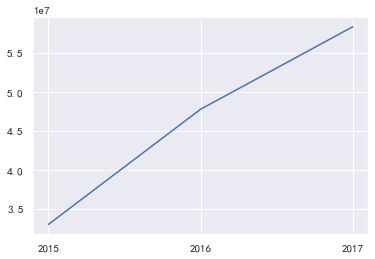

In [21]:
# 11月份走势
x = np.array([2015, 2016, 2017])
y = df.loc[df.时间.dt.month==11, "灭鼠杀虫剂"].values[::-1]

plt.plot(x, y)
plt.xticks(x)

In [22]:
df.head(2)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7814546.15,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,10654973.47,1566651.88,8825870.43


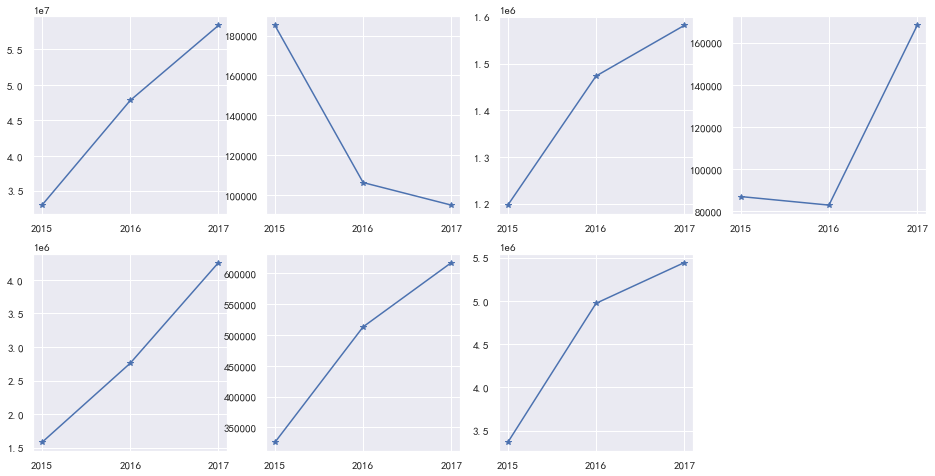

In [23]:
# 画出11月份的所有产品走势

plt.figure(figsize=(4* 4, 2 *4))

for i, col in enumerate(df.columns[1:]):
    # 子图
    axes = plt.subplot(2, 4, i+1)
    # 
    x = np.array([2015, 2016, 2017])
    y = df.loc[df.时间.dt.month==11, col].values[::-1]
    
    axes.plot(x, y, marker='*')
    plt.xticks(x)
    

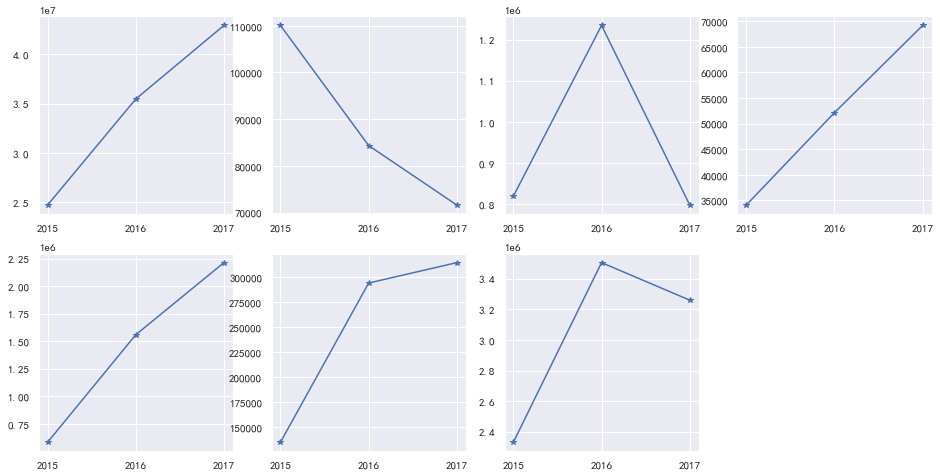

In [24]:
# 画出12月份的所有产品走势

plt.figure(figsize=(4* 4, 2 *4))

for i, col in enumerate(df.columns[1:]):
    # 子图
    axes = plt.subplot(2, 4, i+1)
    # 
    x = np.array([2015, 2016, 2017])
    y = df.loc[df.时间.dt.month==12, col].values[::-1]
    
    axes.plot(x, y, marker='*')
    plt.xticks(x)
    

### 使用线性回归来预测2018年11月，12月的销售额


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# 11月份 灭鼠杀虫剂的走势

# 训练数据
X_train = np.array([2015, 2016, 2017]).reshape(-1, 1)
y_train = df.loc[df.时间.dt.month==11, '灭鼠杀虫剂'].values[::-1]
X_test = np.array([2018]).reshape(-1, 1)

# 线性回归
linear = LinearRegression()
linear.fit(X_train, y_train)

# 预测
y2 = linear.predict(X_test)
y2

array([71752495.99333572])

In [27]:
df.head(2)

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-10-01,1.136548e+08,106531.29,4171283.35,315639.48,7814546.15,1032414.29,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6784500.17,457366.41,10654973.47,1566651.88,8825870.43


In [28]:
import datetime

In [29]:
# 考虑所有产品，所有月份（11月，12月）

# 遍历月份
for month in [11, 12]:
    
    y_list = [datetime.datetime(year=2018, month=month, day=1)]
    
    # 遍历所有产品
    for col in df.columns[1:]:
        
        # 线性回归来预测结果
        X_train = np.array([2015, 2016, 2017]).reshape(-1, 1)
        y_train = df.loc[df.时间.dt.month==month, col].values[::-1]
        X_test = np.array([2018]).reshape(-1, 1)
        
        # 模型
        linear = LinearRegression()
        linear.fit(X_train, y_train)
        
        # 预测
        y = linear.predict(X_test)
        # print(y)
        
        y_list.append(y[0])
    
    # 添加时间
    # print(y_list)
    
    # 把y_list的类型转换成DataFrame
    y_array = np.array(y_list).reshape(1, 8)
    y_df = pd.DataFrame(data=y_array, columns=df.columns)
    display(y_df)
    
    # 拼接
    df = y_df.append(df)
    

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-11-01,71752495.993336,38692.61,1801318.82,193874.386667,5543203.826667,776627.043333,6678677.55


,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,52567630.68,50204.53,928554.256667,86849.166667,3081491.99,426812.586667,3958717.58


In [30]:
df

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,52567630.68,50204.53,928554.256667,86849.166667,3081491.99,426812.586667,3958717.58
0,2018-11-01,71752495.993336,38692.61,1801318.82,193874.386667,5543203.826667,776627.043333,6678677.55
0,2018-10-01,113654778.06,106531.29,4171283.35,315639.48,7814546.15,1032414.29,8541153.59
1,2018-09-01,144026060.6,105666.63,6784500.17,457366.41,10654973.47,1566651.88,8825870.43
2,2018-08-01,154042579.93,201467.03,10709683.41,746513.13,17835577.8,2617149.0,6320153.44
3,2018-07-01,148003236.35,438635.29,16589184.89,1871757.0,38877917.83,6209040.06,6302595.06
4,2018-06-01,135943823.74,953749.78,23526385.73,3641025.92,76499091.86,12484919.63,7047206.98
5,2018-05-01,124164239.14,1238967.37,28118581.25,5032466.78,105039562.97,15309721.94,7942340.44
6,2018-04-01,75096612.94,841051.93,16420341.87,3130513.43,62541652.98,7954875.07,7031364.6
7,2018-03-01,59181816.54,475177.48,7900094.91,1198332.81,26324469.71,2950648.32,6051561.02


In [31]:
# 查看数据的基本情况

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 35
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   时间        38 non-null     datetime64[ns]
 1   灭鼠杀虫剂     38 non-null     object        
 2   电蚊香套装     38 non-null     object        
 3   盘香灭蟑香蚊香盘  38 non-null     object        
 4   蚊香加热器     38 non-null     object        
 5   蚊香液       38 non-null     object        
 6   蚊香片       38 non-null     object        
 7   防霉防蛀片     38 non-null     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 2.7+ KB


In [33]:
df.dtypes

时间          datetime64[ns]
灭鼠杀虫剂               object
电蚊香套装               object
盘香灭蟑香蚊香盘            object
蚊香加热器               object
蚊香液                 object
蚊香片                 object
防霉防蛀片               object
dtype: object

In [34]:
# 把类型转换成float64
df = df.astype( {col:'float64' for col in df.columns[1:]} )
df.dtypes

时间          datetime64[ns]
灭鼠杀虫剂              float64
电蚊香套装              float64
盘香灭蟑香蚊香盘           float64
蚊香加热器              float64
蚊香液                float64
蚊香片                float64
防霉防蛀片              float64
dtype: object

In [35]:
df.head()

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,5.256763e+07,50204.53,9.285543e+05,86849.166667,3.081492e+06,4.268126e+05,3958717.58
0,2018-11-01,7.175250e+07,38692.61,1.801319e+06,193874.386667,5.543204e+06,7.766270e+05,6678677.55
0,2018-10-01,1.136548e+08,106531.29,4.171283e+06,315639.480000,7.814546e+06,1.032414e+06,8541153.59
1,2018-09-01,1.440261e+08,105666.63,6.784500e+06,457366.410000,1.065497e+07,1.566652e+06,8825870.43
2,2018-08-01,1.540426e+08,201467.03,1.070968e+07,746513.130000,1.783558e+07,2.617149e+06,6320153.44


In [36]:
# 将索引重置
df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,时间,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,5.256763e+07,50204.53,9.285543e+05,86849.166667,3.081492e+06,4.268126e+05,3958717.58
1,2018-11-01,7.175250e+07,38692.61,1.801319e+06,193874.386667,5.543204e+06,7.766270e+05,6678677.55
2,2018-10-01,1.136548e+08,106531.29,4.171283e+06,315639.480000,7.814546e+06,1.032414e+06,8541153.59
3,2018-09-01,1.440261e+08,105666.63,6.784500e+06,457366.410000,1.065497e+07,1.566652e+06,8825870.43
4,2018-08-01,1.540426e+08,201467.03,1.070968e+07,746513.130000,1.783558e+07,2.617149e+06,6320153.44


### 查看各类目市场三年内销售额总和的变化趋势

In [38]:
# 求2016的销售总和，2017的销售总和，2018年的销售总和

# df.year = df.时间.dt.year

df.insert(1, '年份', df.时间.dt.year)

In [39]:
df.head()

,时间,年份,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,2018,5.256763e+07,50204.53,9.285543e+05,86849.166667,3.081492e+06,4.268126e+05,3958717.58
1,2018-11-01,2018,7.175250e+07,38692.61,1.801319e+06,193874.386667,5.543204e+06,7.766270e+05,6678677.55
2,2018-10-01,2018,1.136548e+08,106531.29,4.171283e+06,315639.480000,7.814546e+06,1.032414e+06,8541153.59
3,2018-09-01,2018,1.440261e+08,105666.63,6.784500e+06,457366.410000,1.065497e+07,1.566652e+06,8825870.43
4,2018-08-01,2018,1.540426e+08,201467.03,1.070968e+07,746513.130000,1.783558e+07,2.617149e+06,6320153.44


In [40]:
df.tail()

,时间,年份,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
33,2016-03-01,2016,29526097.40,352013.31,1204574.20,246106.75,6656381.71,746709.07,3481194.46
34,2016-02-01,2016,15001352.47,96979.48,449199.41,36193.85,693907.46,109108.05,1274810.96
35,2016-01-01,2016,21078220.78,108412.71,619042.01,49670.25,482889.01,113284.71,1562393.95
36,2015-12-01,2015,24727556.28,110068.83,818479.56,34076.91,583284.49,134890.48,2333602.08
37,2015-11-01,2015,33038726.31,185094.22,1197791.27,86889.91,1579795.72,325744.43,3364112.14


In [41]:
# 去除2015年的数据

df = df.iloc[:-2]
df.tail()

,时间,年份,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
31,2016-05-01,2016,58126963.25,2059879.80,9912801.93,1618361.54,47776896.31,7474421.97,5469360.60
32,2016-04-01,2016,37626021.94,1034992.53,4687913.18,758206.81,24329173.03,3435257.35,5253619.06
33,2016-03-01,2016,29526097.40,352013.31,1204574.20,246106.75,6656381.71,746709.07,3481194.46
34,2016-02-01,2016,15001352.47,96979.48,449199.41,36193.85,693907.46,109108.05,1274810.96
35,2016-01-01,2016,21078220.78,108412.71,619042.01,49670.25,482889.01,113284.71,1562393.95


In [42]:
# 统计每个年份的 所有列目 的销售总额

df.groupby(by='年份').sum()


,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,6.080471e+08,7666572.12,4.785285e+07,5.905205e+06,1.704905e+08,27980839.47,50023001.94
2017,8.477740e+08,9377531.68,8.635539e+07,1.055284e+07,3.300656e+08,49068587.96,62678822.18
2018,1.137893e+09,4537682.09,1.180885e+08,1.683672e+07,3.582077e+08,51845921.56,72701365.23


Text(0.5, 1.0, '近三年驱虫市场趋势')

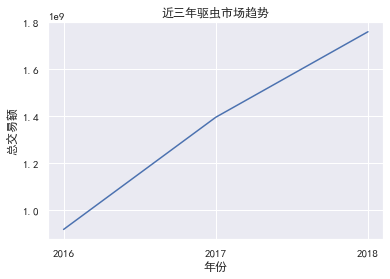

In [43]:
# 画图

df.groupby(by='年份').sum().sum(axis=1).plot()

plt.xticks([2016, 2017, 2018])
plt.ylabel('总交易额')
plt.title('近三年驱虫市场趋势')

In [44]:

# 可以看出:近三年呈增长趋势,整个市场倾向于成长期和成熟期


Text(2017.9, 1050000000.0, '1137893000.0')

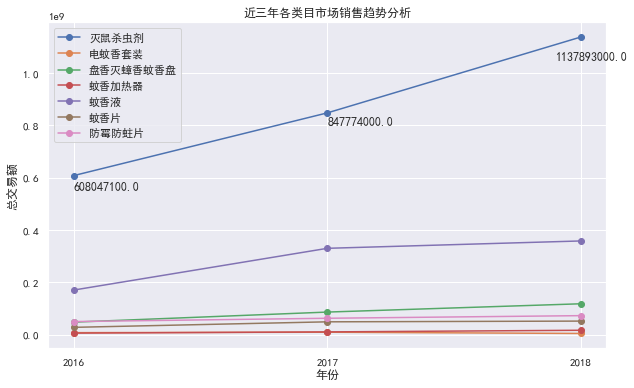

In [45]:
# 查看各类目市场三年内销售额总和的变化趋势

df.groupby(by='年份').sum().plot(figsize=(10, 6), marker='o')

plt.xticks([2016, 2017, 2018])
plt.ylabel('总交易额')
plt.title('近三年各类目市场销售趋势分析')

plt.text(2016, 0.55e9, 6.080471e+08)
plt.text(2017, 0.8e9, 8.477740e+08)
plt.text(2018-0.1, 1.05e9, 1.137893e+09)


# 灭鼠杀虫剂，近三年来增长较快， 销售占比最高


### 查看各类目市场三年内销售额总和的占比

In [46]:
df.head()

,时间,年份,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,2018,5.256763e+07,50204.53,9.285543e+05,86849.166667,3.081492e+06,4.268126e+05,3958717.58
1,2018-11-01,2018,7.175250e+07,38692.61,1.801319e+06,193874.386667,5.543204e+06,7.766270e+05,6678677.55
2,2018-10-01,2018,1.136548e+08,106531.29,4.171283e+06,315639.480000,7.814546e+06,1.032414e+06,8541153.59
3,2018-09-01,2018,1.440261e+08,105666.63,6.784500e+06,457366.410000,1.065497e+07,1.566652e+06,8825870.43
4,2018-08-01,2018,1.540426e+08,201467.03,1.070968e+07,746513.130000,1.783558e+07,2.617149e+06,6320153.44


In [47]:
df.groupby(by='年份').sum()

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,6.080471e+08,7666572.12,4.785285e+07,5.905205e+06,1.704905e+08,27980839.47,50023001.94
2017,8.477740e+08,9377531.68,8.635539e+07,1.055284e+07,3.300656e+08,49068587.96,62678822.18
2018,1.137893e+09,4537682.09,1.180885e+08,1.683672e+07,3.582077e+08,51845921.56,72701365.23


In [48]:
# 先计算得到每一年的销售总额
year_total = df.groupby(by='年份').sum().sum(axis=1)
year_total

年份
2016    9.179661e+08
2017    1.395873e+09
2018    1.760111e+09
dtype: float64

In [49]:
6.080471e+08 / 9.179661e+08

0.6623851360088352

In [50]:
# 求占比
df.groupby(by='年份').sum().divide(year_total, axis='index')

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,0.662385,0.008352,0.052129,0.006433,0.185726,0.030481,0.054493
2017,0.607343,0.006718,0.061865,0.007560,0.236458,0.035153,0.044903
2018,0.646489,0.002578,0.067092,0.009566,0.203514,0.029456,0.041305


Text(1.9, 0.5, '64.65%')

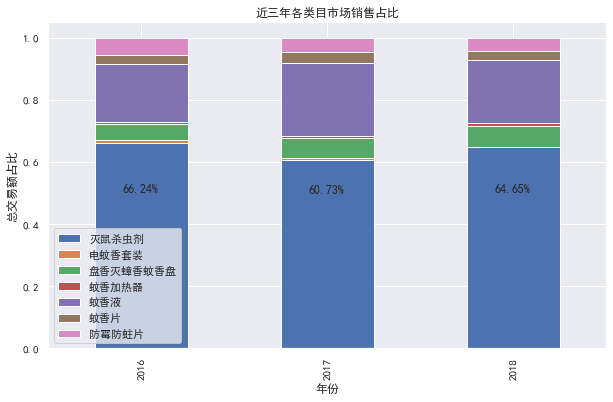

In [51]:
# 画图

# 求占比
df2 = df.groupby(by='年份').sum().divide(year_total, axis='index')

# 画图
df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('总交易额占比')
plt.title('近三年各类目市场销售占比')

plt.text(0-0.1, 0.5, '66.24%')
plt.text(1-0.1, 0.5, '60.73%')
plt.text(2-0.1, 0.5, '64.65%')

### 进一步分析各类目市场16-17年17-18年增幅

In [52]:
# 16-17增幅 = （ 2017年销售总额 - 2016年的销售总额 ）/ 2016年的销售总额
# 17-18增幅 = （ 2018年销售总额 - 2017年的销售总额 ）/ 2017年的销售总额

In [53]:
year_df =  df.groupby(by='年份').sum()
year_df

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,6.080471e+08,7666572.12,4.785285e+07,5.905205e+06,1.704905e+08,27980839.47,50023001.94
2017,8.477740e+08,9377531.68,8.635539e+07,1.055284e+07,3.300656e+08,49068587.96,62678822.18
2018,1.137893e+09,4537682.09,1.180885e+08,1.683672e+07,3.582077e+08,51845921.56,72701365.23


In [54]:
# 16-17增幅 = （ 2017年销售总额 - 2016年的销售总额 ）/ 2016年的销售总额

growth_2016_2017 = (year_df.loc[2017] - year_df.loc[2016]) / year_df.loc[2016]
growth_2016_2017


灭鼠杀虫剂       0.394257
电蚊香套装       0.223171
盘香灭蟑香蚊香盘    0.804603
蚊香加热器       0.787041
蚊香液         0.935976
蚊香片         0.753650
防霉防蛀片       0.253000
dtype: float64

In [55]:
# 17-18增幅 = （ 2018年销售总额 - 2017年的销售总额 ）/ 2017年的销售总额

growth_2017_2018 = (year_df.loc[2018] - year_df.loc[2017]) / year_df.loc[2017]
growth_2017_2018


灭鼠杀虫剂       0.342213
电蚊香套装      -0.516111
盘香灭蟑香蚊香盘    0.367471
蚊香加热器       0.595468
蚊香液         0.085262
蚊香片         0.056601
防霉防蛀片       0.159903
dtype: float64

In [56]:
# 拼接，修改列索引
year_df2 = pd.concat((growth_2016_2017, growth_2017_2018), axis=1)
year_df2.columns = ['16-17', '17-18']
year_df2

,16-17,17-18
灭鼠杀虫剂,0.394257,0.342213
电蚊香套装,0.223171,-0.516111
盘香灭蟑香蚊香盘,0.804603,0.367471
蚊香加热器,0.787041,0.595468
蚊香液,0.935976,0.085262
蚊香片,0.753650,0.056601
防霉防蛀片,0.253000,0.159903


In [57]:
year_df2.T

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
16-17,0.394257,0.223171,0.804603,0.787041,0.935976,0.753650,0.253000
17-18,0.342213,-0.516111,0.367471,0.595468,0.085262,0.056601,0.159903


Text(0.5, 0, '年份')

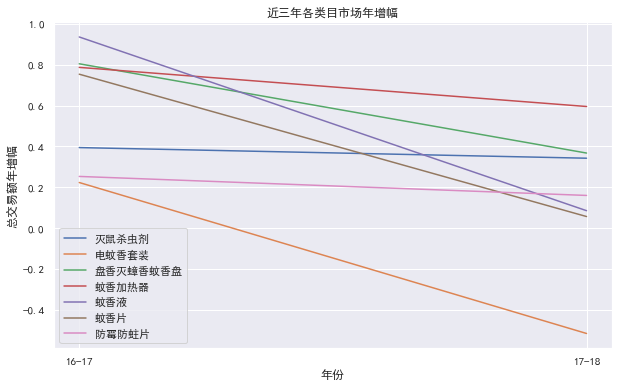

In [58]:
# 画图
year_df2.T.plot(figsize=(10, 6))

plt.xticks([0,1], ['16-17', '17-18'])

plt.ylabel('总交易额年增幅')
plt.title('近三年各类目市场年增幅')
plt.xlabel('年份')


# 可见除了灭鼠杀虫剂和蚊香液增幅比较稳定,其它都有下降甚至变负


### 驱虫市场的潜力分析-垄断

In [59]:
1/0.643

# 1.5552099533437014
# 相当于 市场只由1.55家公司来分割

1.5552099533437014

In [60]:
# 导入数据： top100
top100 = pd.read_excel('top100品牌数据.xlsx')
top100.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析
1,科凌虫控,2,474937,-0.1910,1581,趋势分析
2,ARS/安速,3,402372,-0.2682,1448,趋势分析
3,思乐智,4,360780,0.2056,841,趋势分析
4,希诺,5,346656,-0.1085,1865,趋势分析


In [61]:
# 先计算市场份额： 交易指数占比

top100['市场份额'] = top100.交易指数 / top100.交易指数.sum()

In [62]:
top100.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作,市场份额
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析,0.035998
1,科凌虫控,2,474937,-0.1910,1581,趋势分析,0.032237
2,ARS/安速,3,402372,-0.2682,1448,趋势分析,0.027311
3,思乐智,4,360780,0.2056,841,趋势分析,0.024488
4,希诺,5,346656,-0.1085,1865,趋势分析,0.023530


In [63]:
# 计算HHI

HHI = ( top100.市场份额**2 ).sum()
HHI
# 0.013546334007208918

# 范围: 
#     [1/N,‘高度竞争行业’,0.01],
#      (0.01,‘不集中的行业’,0.15],
#      (0.15,‘中等集中’,0.25],
#      (0.25,‘高度集中’,1]

# 结论： 属于“不集中的行业”，不存在垄断


0.013546334007208918

In [64]:
1/HHI

# 市场由73家公司竞争，没有垄断

73.82071042009098

In [65]:
# 画图
top100.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作,市场份额
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析,0.035998
1,科凌虫控,2,474937,-0.1910,1581,趋势分析,0.032237
2,ARS/安速,3,402372,-0.2682,1448,趋势分析,0.027311
3,思乐智,4,360780,0.2056,841,趋势分析,0.024488
4,希诺,5,346656,-0.1085,1865,趋势分析,0.023530


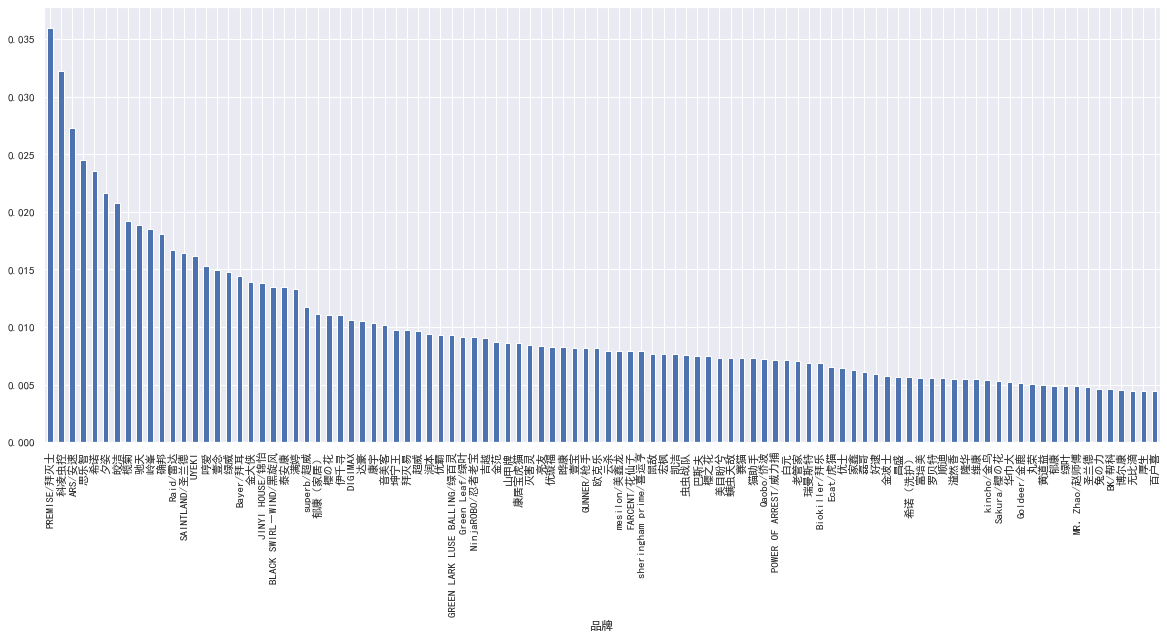

In [66]:
top100.市场份额.plot(kind='bar', figsize=(20, 8))

plt.xticks(range(100), top100.品牌.values)
plt.xlabel('品牌')
plt.show()

## 灭鼠杀虫剂细分市场

### 产品类别

In [194]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\灭鼠杀虫剂细分市场')

In [195]:
files = glob.glob('*')
files

['杀虫.xlsx', '灭鼠.xlsx', '虱子.xlsx', '螨.xlsx', '蟑螂.xlsx']

In [196]:
# 读取5个文件

data_list = []
for file in files:
    data = pd.read_excel(file)
    # display(data)
    
    data_list.append(data)

In [197]:
# 拼接
market = pd.concat(data_list)
market.head(1)

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,包装数量,农药登记号,容量,使用时间,生产厂家,宝贝成份,规格：,樟脑,包装,产品名
0,杀虫,2018/11/22 18:49:48,16,18,https://item.taobao.com/item.htm?id=578459866289,https://gw3.alicdn.com/bao/uploaded/i3/4089164...,https://cloud.video.taobao.com/play/u/40891647...,德国拜耳臭虫杀虫剂家用杀灭除跳蚤药苍蝇猫狗窝喷剂蟑螂药,578459866289,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
market.shape

(6556, 229)

#### 清洗数据

In [199]:
market.isnull().any()  # 有null的列
market.isnull().all()  # 全部为null的列

类别      False
时间      False
页码      False
排名      False
链接      False
        ...  
宝贝成份     True
规格：      True
樟脑       True
包装       True
产品名      True
Length: 229, dtype: bool

In [200]:
market.isnull().mean()

类别      0.0
时间      0.0
页码      0.0
排名      0.0
链接      0.0
       ... 
宝贝成份    1.0
规格：     1.0
樟脑      1.0
包装      1.0
产品名     1.0
Length: 229, dtype: float64

In [201]:
# 去除缺失了90%以上的列
cond = market.isnull().mean() > 0.9

market2 = market.loc[:, ~cond].copy()
market2

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,农药登记证号,生产企业,农药生产许可证/批准文号,农药产品标准证号,农药名称,剂型,农药成分,有效成分总含量,毒性,防治对象
0,杀虫,2018/11/22 18:49:48,16,18,https://item.taobao.com/item.htm?id=578459866289,https://gw3.alicdn.com/bao/uploaded/i3/4089164...,https://cloud.video.taobao.com/play/u/40891647...,德国拜耳臭虫杀虫剂家用杀灭除跳蚤药苍蝇猫狗窝喷剂蟑螂药,578459866289,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,杀虫,2018/11/22 18:49:49,16,19,https://item.taobao.com/item.htm?id=548196868239,https://gw3.alicdn.com/bao/uploaded/i3/1519846...,NaN,蟑螂屋灭蟑螂药家用强力灭蟑清捕捉器除杀蟑螂贴粘板粉杀虫剂特价,548196868239,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,杀虫,2018/11/22 18:49:49,16,20,https://item.taobao.com/item.htm?id=580839295562,https://gw3.alicdn.com/bao/uploaded/i2/1052281...,NaN,日本Hengai哼爱螨虫贴除螨虫垫祛螨床上用品沙发吸螨包家用杀虫,580839295562,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,杀虫,2018/11/22 18:49:50,17,1,https://item.taobao.com/item.htm?id=580264662322,https://gw2.alicdn.com/bao/uploaded/i4/2844890...,NaN,蚧壳虫专杀小白药小黑飞多肉花卉介壳虫用专治dx柑橘树植物杀虫剂,580264662322,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,杀虫,2018/11/22 18:49:52,17,2,https://item.taobao.com/item.htm?id=44484517973,https://gw1.alicdn.com/bao/uploaded/i3/2094913...,NaN,雷达杀虫气雾剂清香型家用式蚊子苍蝇蟑螂蚂蚁除虫杀虫剂害虫喷剂,44484517973,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,蟑螂,2018/11/22 19:22:37,100,16,https://item.taobao.com/item.htm?id=567322968739,https://gw3.alicdn.com/bao/uploaded/i4/1809710...,NaN,达豪杀蟑笔剂正品神笔蟑螂药跳蚤杀蟑粉笔画笔蚂蚁强效触杀全巢灭,567322968739,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,蟑螂,2018/11/22 19:22:38,100,17,https://item.taobao.com/item.htm?id=547638024194,https://gw3.alicdn.com/bao/uploaded/i4/2825064...,NaN,榄菊速杀杀虫气雾剂 杀蟑螂、跳蚤等蚊虫2件24瓶375元包邮,547638024194,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,蟑螂,2018/11/22 19:22:39,100,18,https://item.taobao.com/item.htm?id=572950517334,https://gw3.alicdn.com/bao/uploaded/i1/4682278...,NaN,全无敌家用室内600ml杀虫剂无香卧室 驱杀蟑螂蚂蚁苍蝇喷雾气雾剂,572950517334,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,蟑螂,2018/11/22 19:22:40,100,19,https://item.taobao.com/item.htm?id=540393439567,https://gw2.alicdn.com/bao/uploaded/i4/2995676...,NaN,云杀 蟑螂小强药杀蟑胶饵除灭蟑螂屋粘贴板驱蟑粉厨房家用虫剂,540393439567,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
market2.shape

(6556, 36)

In [203]:
market2.类别.unique()

array(['杀虫', '灭鼠', '虱', '螨', '蟑螂'], dtype=object)

In [204]:
market2.类别.nunique()  # number unique

5

In [205]:
# 遍历，找到唯一值的类目
for col in market2.columns:
    num = market2[col].nunique()
    # print(col, num)
    
    if num < 5:
        print(col, num)

类目 1
店铺类型 2
毒性 3


In [206]:
# 发现： 类目的值是唯一的，只有一种值，我们可以去掉这个列

market2.drop(columns='类目', inplace=True)


In [207]:
market2.shape

(6556, 35)

In [208]:
# 再查看一下空值较多的列
market2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6556 entries, 0 to 1742
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   类别            6556 non-null   object 
 1   时间            6556 non-null   object 
 2   页码            6556 non-null   int64  
 3   排名            6556 non-null   int64  
 4   链接            6556 non-null   object 
 5   主图链接          6556 non-null   object 
 6   主图视频链接        1660 non-null   object 
 7   宝贝标题          6556 non-null   object 
 8   宝贝ID          6556 non-null   int64  
 9   销量（人数）        6556 non-null   int64  
 10  售价            6556 non-null   float64
 11  预估销售额         6520 non-null   float64
 12  运费            6556 non-null   float64
 13  评价人数          6406 non-null   float64
 14  收藏人数          6556 non-null   int64  
 15  下架时间          6556 non-null   object 
 16  地域            3888 non-null   object 
 17  旺旺            6556 non-null   object 
 18  店铺类型          6556 non-null 

In [209]:
market2.isnull().mean()

类别              0.000000
时间              0.000000
页码              0.000000
排名              0.000000
链接              0.000000
主图链接            0.000000
主图视频链接          0.746797
宝贝标题            0.000000
宝贝ID            0.000000
销量（人数）          0.000000
售价              0.000000
预估销售额           0.005491
运费              0.000000
评价人数            0.022880
收藏人数            0.000000
下架时间            0.000000
地域              0.406955
旺旺              0.000000
店铺类型            0.000000
品牌              0.095333
型号              0.423276
净含量             0.421599
适用对象            0.279896
物理形态            0.286303
产品名称            0.796980
农药登记证号          0.873093
生产企业            0.888957
农药生产许可证/批准文号    0.889262
农药产品标准证号        0.889262
农药名称            0.889262
剂型              0.882093
农药成分            0.885754
有效成分总含量         0.889262
毒性              0.873093
防治对象            0.889262
dtype: float64

In [210]:
# 发现还有很多空值占比较高的列
#  删除：产品名称及之后的所有列

# 取名称在列表中对应的下标
iloc = market2.columns.get_loc('产品名称')

# 取前面要保留的列
market3 = market2.iloc[:, :iloc].copy()
market3.shape

(6556, 24)

In [211]:
market3.columns

Index(['类别', '时间', '页码', '排名', '链接', '主图链接', '主图视频链接', '宝贝标题', '宝贝ID',
       '销量（人数）', '售价', '预估销售额', '运费', '评价人数', '收藏人数', '下架时间', '地域', '旺旺',
       '店铺类型', '品牌', '型号', '净含量', '适用对象', '物理形态'],
      dtype='object')

In [212]:
# 去掉逻辑上不可用的列,
#    如:‘时间’,‘链 接’,‘主图链接’,‘主图视频链接’,‘页码’,
#      ‘排名’,‘宝贝标题’,‘运费’,‘下架时间’,‘旺旺’

market3.drop(columns=['时间', '页码', '排名', '链接', '主图链接', '主图视频链接', 
                      '宝贝标题', '运费', '下架时间', '旺旺'], inplace=True)


In [213]:
market3.shape

(6556, 14)

In [214]:
market3.head()

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态
0,杀虫,578459866289,99,29.9,2960.1,26.0,202,NaN,天猫,拜耳,特姆得,NaN,蟑螂,液体
1,杀虫,548196868239,99,0.6,59.4,1330.0,242,浙江 金华,淘宝,佰凌,180325,NaN,NaN,NaN
2,杀虫,580839295562,99,98.0,9702.0,44.0,27,广东 深圳,淘宝,NaN,NaN,NaN,NaN,NaN
3,杀虫,580264662322,99,6.9,683.1,24.0,26,河南 商丘,淘宝,SHURONGCROP/树荣作物,NaN,30g,NaN,NaN
4,杀虫,44484517973,99,18.8,1861.2,121.0,133,河北 秦皇岛,天猫,Raid/雷达,雷达杀虫气雾剂清香,600ml,蟑螂,喷雾


In [215]:
market3.isnull().mean()

market3.isna().mean()

market3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6556 entries, 0 to 1742
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   类别      6556 non-null   object 
 1   宝贝ID    6556 non-null   int64  
 2   销量（人数）  6556 non-null   int64  
 3   售价      6556 non-null   float64
 4   预估销售额   6520 non-null   float64
 5   评价人数    6406 non-null   float64
 6   收藏人数    6556 non-null   int64  
 7   地域      3888 non-null   object 
 8   店铺类型    6556 non-null   object 
 9   品牌      5931 non-null   object 
 10  型号      3781 non-null   object 
 11  净含量     3792 non-null   object 
 12  适用对象    4721 non-null   object 
 13  物理形态    4679 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 768.3+ KB


<AxesSubplot:ylabel='预估销售额'>

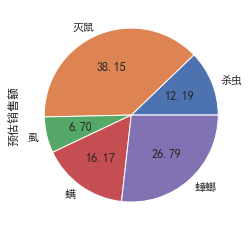

In [216]:
# 画图

market3.groupby(by='类别')['预估销售额'].sum().plot(kind='pie', autopct='%.2f')


In [217]:
# 可以看出重点需要研究的市场是灭鼠和蟑螂,这里我们选择灭鼠

### 灭鼠类别分析

In [218]:
# 灭鼠数据
market3.head()

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态
0,杀虫,578459866289,99,29.9,2960.1,26.0,202,NaN,天猫,拜耳,特姆得,NaN,蟑螂,液体
1,杀虫,548196868239,99,0.6,59.4,1330.0,242,浙江 金华,淘宝,佰凌,180325,NaN,NaN,NaN
2,杀虫,580839295562,99,98.0,9702.0,44.0,27,广东 深圳,淘宝,NaN,NaN,NaN,NaN,NaN
3,杀虫,580264662322,99,6.9,683.1,24.0,26,河南 商丘,淘宝,SHURONGCROP/树荣作物,NaN,30g,NaN,NaN
4,杀虫,44484517973,99,18.8,1861.2,121.0,133,河北 秦皇岛,天猫,Raid/雷达,雷达杀虫气雾剂清香,600ml,蟑螂,喷雾


In [219]:
# 灭鼠的数据
mouse = market3.loc[market3.类别=='灭鼠'].copy()
mouse

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态
0,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水
1,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水
2,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体
3,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体
4,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体
1520,灭鼠,520862079013,0,64.00,NaN,0.0,2,广东 广州,淘宝,九行,NaN,NaN,NaN,粉状
1521,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体


In [220]:
mouse.describe()
mouse.describe([.90, .99])

,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数
count,1.523000e+03,1523.000000,1523.000000,1.504000e+03,1421.000000,1523.000000
mean,4.657358e+11,558.900854,49.018910,1.707847e+04,891.865588,1202.402495
std,2.034076e+11,5657.138493,69.762057,1.172321e+05,5722.909170,5864.130330
min,1.868822e+09,0.000000,0.010000,1.000000e-02,0.000000,0.000000
50%,5.605955e+11,10.000000,27.700000,2.985000e+02,26.000000,35.000000
90%,5.777138e+11,347.200000,99.800000,1.547613e+04,880.000000,1526.800000
99%,5.811354e+11,9187.000000,411.400000,2.903451e+05,17619.000000,24509.000000
max,5.823559e+11,143037.000000,498.000000,2.672898e+06,120828.000000,97033.000000


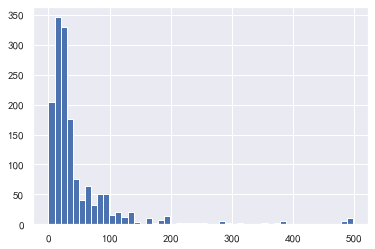

In [221]:
# 查看
plt.hist(x='售价', data=mouse, bins=50)
plt.show()

In [222]:
# 按价格来分区

bins = [0, 50, 100, 150, 200, 250, 300, 500]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300以上']

# 价格区间
mouse['价格区间'] = pd.cut(mouse.售价, bins=bins, labels=labels)
mouse.tail()

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN,0-50
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,0-50
1520,灭鼠,520862079013,0,64.00,NaN,0.0,2,广东 广州,淘宝,九行,NaN,NaN,NaN,粉状,50-100
1521,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,0-50
1522,灭鼠,579381539073,0,95.04,NaN,0.0,0,NaN,淘宝,自主品牌,无,NaN,NaN,NaN,50-100


In [223]:
# 预估销售额

mouse2 = mouse.groupby(by='价格区间')[['预估销售额']].sum()
mouse2

,预估销售额
价格区间,
0-50,15162086.51
50-100,3335060.19
100-150,2758086.29
150-200,629813.00
200-250,2743758.00
250-300,237740.00
300以上,819468.00


In [224]:
# 销售额占比

mouse2['销售额占比'] = mouse2.预估销售额 / mouse2.预估销售额.sum()

In [225]:
mouse2

,预估销售额,销售额占比
价格区间,,
0-50,15162086.51,0.590286
50-100,3335060.19,0.129840
100-150,2758086.29,0.107377
150-200,629813.00,0.024520
200-250,2743758.00,0.106819
250-300,237740.00,0.009256
300以上,819468.00,0.031903


In [226]:
# 宝贝数

mouse.head()


,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间
0,灭鼠,566054780243,9976,26.8,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
1,灭鼠,566054780243,9976,26.8,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
2,灭鼠,572115448996,9945,9.9,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-50
3,灭鼠,39868408322,99,29.9,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,0-50
4,灭鼠,520282897220,99,39.9,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,0-50


In [227]:
mouse.drop_duplicates(subset=['宝贝ID'])

mouse2['宝贝数'] = mouse.drop_duplicates(subset=['宝贝ID']).groupby(by='价格区间')[['宝贝ID']].count()

In [228]:
mouse2

,预估销售额,销售额占比,宝贝数
价格区间,,,
0-50,15162086.51,0.590286,854
50-100,3335060.19,0.129840,172
100-150,2758086.29,0.107377,46
150-200,629813.00,0.024520,28
200-250,2743758.00,0.106819,7
250-300,237740.00,0.009256,9
300以上,819468.00,0.031903,18


In [229]:
# 宝贝数占比

mouse2['宝贝数占比'] = mouse2.宝贝数 / mouse2.宝贝数.sum()
mouse2

,预估销售额,销售额占比,宝贝数,宝贝数占比
价格区间,,,,
0-50,15162086.51,0.590286,854,0.753086
50-100,3335060.19,0.129840,172,0.151675
100-150,2758086.29,0.107377,46,0.040564
150-200,629813.00,0.024520,28,0.024691
200-250,2743758.00,0.106819,7,0.006173
250-300,237740.00,0.009256,9,0.007937
300以上,819468.00,0.031903,18,0.015873


In [230]:
# 单宝贝平均销售额

mouse2['单宝贝平均销售额'] = mouse2.预估销售额 / mouse2.宝贝数
mouse2

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额
价格区间,,,,,
0-50,15162086.51,0.590286,854,0.753086,17754.199660
50-100,3335060.19,0.129840,172,0.151675,19389.884826
100-150,2758086.29,0.107377,46,0.040564,59958.397609
150-200,629813.00,0.024520,28,0.024691,22493.321429
200-250,2743758.00,0.106819,7,0.006173,391965.428571
250-300,237740.00,0.009256,9,0.007937,26415.555556
300以上,819468.00,0.031903,18,0.015873,45526.000000


In [231]:
# 相对竞争度
#  1 - （d - dmin）/ (dmax - dmin)

d_min = mouse2['单宝贝平均销售额'].min()
d_max = mouse2['单宝贝平均销售额'].max()

# 1 - (mouse2['单宝贝平均销售额'] - d_min) / (d_max - d_min)

mouse2['相对竞争度'] = 1 - (mouse2['单宝贝平均销售额'] - d_min) / (d_max - d_min)
mouse2

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格区间,,,,,,
0-50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000
50-100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
100-150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
150-200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
200-250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
250-300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
300以上,819468.00,0.031903,18,0.015873,45526.000000,0.925786


In [232]:
# 按照相对竞争度 升序
mouse2.sort_values(by='相对竞争度', inplace=True)

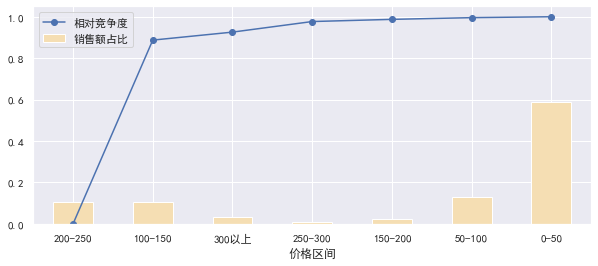

In [233]:
# 画图

# 销售额占比 柱形图
mouse2['销售额占比'].plot(kind='bar', color='wheat', figsize=(10, 4))

# 相对竞争度 折线图
mouse2['相对竞争度'].plot( figsize=(10, 4), marker='o')

plt.legend()

In [234]:
# 发现： 
#   200-250价格区间 竞争度为0，几乎没有竞争
#   0-50 价格区间 销售额最大，同时也存在较大的竞争

#### 0_50细分价格市场

In [235]:
# 这里我们选择容量最大的0-50细分市场进一步分析
# 再一次细分得到新的更小的价格区间,计算每个区间的指标

In [236]:
mouse0_50 = mouse[mouse.价格区间=='0-50'].copy()
mouse0_50

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间
0,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
1,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
2,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-50
3,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,0-50
4,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,灭鼠,573793765449,0,17.16,NaN,6.0,0,北京,淘宝,NaN,NaN,NaN,老鼠,NaN,0-50
1514,灭鼠,36825350895,0,0.60,NaN,10.0,63,NaN,淘宝,剑牌,NaN,NaN,老鼠,固体,0-50
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN,0-50
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,0-50


In [237]:
mouse0_50.describe()

,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数
count,1.138000e+03,1138.000000,1138.000000,1.130000e+03,1068.000000,1138.000000
mean,4.726499e+11,672.623902,21.645870,1.341778e+04,787.092697,1010.808436
std,1.979288e+11,6520.075009,11.683421,1.016365e+05,5210.409751,5573.773335
min,1.868822e+09,0.000000,0.010000,1.000000e-02,0.000000,0.000000
25%,5.296209e+11,3.000000,13.977500,5.127000e+01,4.000000,4.000000
50%,5.615696e+11,9.000000,20.550000,1.740000e+02,22.000000,21.000000
75%,5.737919e+11,40.000000,29.800000,8.046000e+02,114.000000,115.000000
max,5.823559e+11,143037.000000,50.000000,2.116948e+06,120828.000000,97033.000000


In [238]:
# 分区
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']

mouse0_50['细分价格区间'] = pd.cut(mouse0_50.售价, bins=bins, labels=labels)

In [239]:
mouse0_50

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间,细分价格区间
0,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30
1,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30
2,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-50,0-10
3,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,0-50,20-30
4,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,0-50,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,灭鼠,573793765449,0,17.16,NaN,6.0,0,北京,淘宝,NaN,NaN,NaN,老鼠,NaN,0-50,10-20
1514,灭鼠,36825350895,0,0.60,NaN,10.0,63,NaN,淘宝,剑牌,NaN,NaN,老鼠,固体,0-50,0-10
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN,0-50,20-30
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,0-50,30-40


In [240]:

def process_data(mouse, by):
    
    mouse2 = mouse.groupby(by=by)[['预估销售额']].sum()
    mouse2['销售额占比'] = mouse2.预估销售额 / mouse2.预估销售额.sum()
    mouse2['宝贝数'] = mouse.drop_duplicates(subset=['宝贝ID']).groupby(by=by)[['宝贝ID']].count()
    mouse2['宝贝数占比'] = mouse2.宝贝数 / mouse2.宝贝数.sum()
    mouse2['单宝贝平均销售额'] = mouse2.预估销售额 / mouse2.宝贝数

    d_min = mouse2['单宝贝平均销售额'].min()
    d_max = mouse2['单宝贝平均销售额'].max()
    mouse2['相对竞争度'] = 1 - (mouse2['单宝贝平均销售额'] - d_min) / (d_max - d_min)

    return mouse2

In [241]:
mouse0_50_2 = process_data(mouse0_50, by='细分价格区间')
mouse0_50_2

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
细分价格区间,,,,,,
0-10,141388.77,0.009325,166,0.194379,851.739578,1.000000
10-20,8102634.14,0.534401,272,0.318501,29789.096103,0.000000
20-30,4969620.92,0.327766,278,0.325527,17876.334245,0.411674
30-40,1240874.19,0.081841,98,0.114754,12661.981531,0.591869
40-50,707568.49,0.046667,40,0.046838,17689.212250,0.418141


In [242]:
# 画图
def draw(mouse2, order=True):
    
    if order:
        # 按照相对竞争度 升序
        mouse2.sort_values(by='相对竞争度', inplace=True)

    # 销售额占比 柱形图
    mouse2['销售额占比'].plot(kind='bar', color='wheat', figsize=(10, 4))

    # 相对竞争度 折线图
    mouse2['相对竞争度'].plot( figsize=(10, 4), marker='o')
    
    if not order:
        plt.xticks(rotation=90)
    
    plt.legend()    
    
    

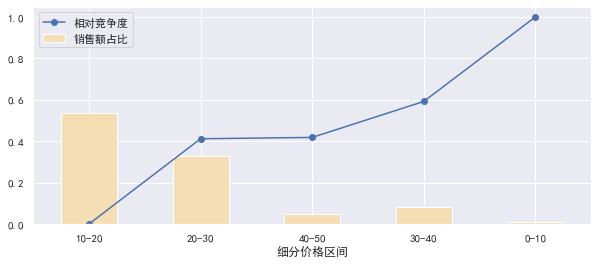

In [243]:
draw(mouse0_50_2)

In [244]:
#  可见10-20竞争度低,容量大,优选, 继续加到对10-20价格区间的投入
#  20-30也不错

#### 店铺类型

In [245]:
mouse0_50_store = process_data(mouse0_50, by='店铺类型')
mouse0_50_store

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
店铺类型,,,,,,
天猫,14019740.58,0.924658,220,0.257611,63726.093545,0.0
淘宝,1142345.93,0.075342,634,0.742389,1801.807461,1.0


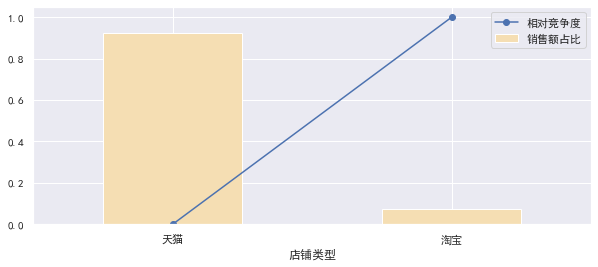

In [246]:
# 画图
draw(mouse0_50_store)

#### 型号

In [247]:
mouse0_50.head()

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间,细分价格区间
0,灭鼠,566054780243,9976,26.8,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30
1,灭鼠,566054780243,9976,26.8,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30
2,灭鼠,572115448996,9945,9.9,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-50,0-10
3,灭鼠,39868408322,99,29.9,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,0-50,20-30
4,灭鼠,520282897220,99,39.9,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,0-50,30-40


In [248]:
process_data(mouse0_50, by='型号')

# 总共有505个类型，我们取销售额占比排名靠前的20个
mouse0_50_type_top20 = process_data(mouse0_50, by='型号').sort_values(by='销售额占比', ascending=False)[:20]
mouse0_50_type_top20

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
型号,,,,,,
超强力粘鼠板,2120129.32,0.142219,12,0.021661,176677.443333,0.669585
粘鼠板老鼠贴,2051699.02,0.137629,7,0.012635,293099.860000,0.451856
0005,927590.70,0.062223,2,0.003610,463795.350000,0.132628
驰天粘鼠板,876606.33,0.058803,4,0.007220,219151.582500,0.590151
QL-866,759629.30,0.050956,3,0.005415,253209.766667,0.526457
MT007,534713.60,0.035869,1,0.001805,534713.600000,0.000000
强力粘鼠魔毯,496974.60,0.033337,1,0.001805,496974.600000,0.070578
拜灭士5g,420982.40,0.028240,1,0.001805,420982.400000,0.212696
CQL-1,391271.40,0.026247,1,0.001805,391271.400000,0.268260


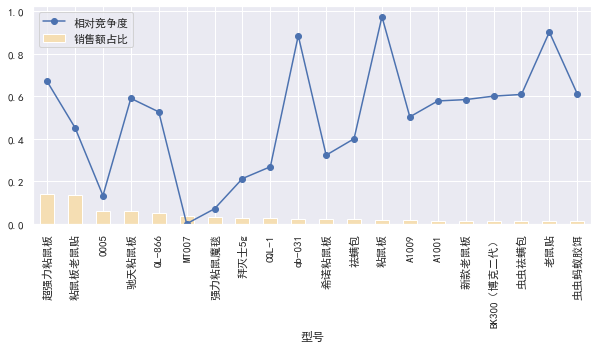

In [249]:
# 画图
draw(mouse0_50_type_top20, False)

In [250]:

# 0005，MT007 市场份额相对还不错，同时竞争低，没有什么竞争对手，可以重点发展
# 超强力粘鼠板，粘鼠板老鼠贴销量最高，同时竞争度也高，需要保持高销量


#### 物理形态

In [251]:

mouse0_50_state = process_data(mouse0_50, by='物理形态')
mouse0_50_state

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
物理形态,,,,,,
5个1元硬币厚硬板,5226.00,0.000398,1,0.001490,5226.000000,0.990482
啫喱,256687.10,0.019541,38,0.056632,6754.923684,0.987622
喷雾,275280.33,0.020956,6,0.008942,45880.055000,0.914433
固体,11381498.83,0.866443,583,0.868852,19522.296449,0.963738
声波,328.90,0.000025,1,0.001490,328.900000,0.999642
气体,1357.18,0.000103,1,0.001490,1357.180000,0.997719
油状,2341.60,0.000178,2,0.002981,1170.800000,0.998068
液体,354235.50,0.026967,22,0.032787,16101.613636,0.970137
粉状,322931.28,0.024584,9,0.013413,35881.253333,0.933137


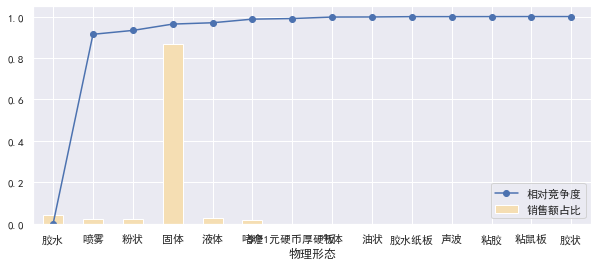

In [252]:
draw(mouse0_50_state)

In [253]:

# 固体形状的销量最突出，最高
# 胶水形状的销量还不错，同时没有竞争对手，可以重点发展，提前占领市场


# 可见市场份额最高的是固体,竞争度也偏高,而胶水虽然竞争度低,但是市场份额较低
# 基本可以认为常见的物理形态就是固体


#### 物理形态,净含量

In [254]:
mouse0_50.head(2)

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间,细分价格区间
0,灭鼠,566054780243,9976,26.8,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30
1,灭鼠,566054780243,9976,26.8,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50,20-30


In [255]:
mouse0_50_state_unit = process_data(mouse0_50, by=['物理形态', '净含量']) \
                .sort_values(by='销售额占比', ascending=False)[:50]
mouse0_50_state_unit

预估销售额     销售额占比  宝贝数     宝贝数占比       单宝贝平均销售额     相对竞争度
物理形态 净含量                                                                 
固体   1       2122422.34  0.530981   17  0.069672  124848.372941  0.403519
喷雾   600ml    274808.80  0.068751    2  0.008197  137404.400000  0.343531
固体   20g      243594.06  0.060942    3  0.012295   81198.020000  0.612065
     118.5g   209308.20  0.052364    1  0.004098  209308.200000  0.000000
液体   500g     165396.00  0.041378    1  0.004098  165396.000000  0.209797
固体   2.2KG    140739.32  0.035210    2  0.008197   70369.660000  0.663799
     6个装      139575.50  0.034919    1  0.004098  139575.500000  0.333158
啫喱   12g      135912.00  0.034002    1  0.004098  135912.000000  0.350661
固体   0.17KG   133950.00  0.033511    1  0.004098  133950.000000  0.360035
液体   450ML     51494.78  0.012883    2  0.008197   25747.390000  0.876988
啫喱   10克/支     40650.00  0.010170    1  0.004098   40650.000000  0.805789
液体   450ml     37570.20  0.009399    4  0.016393    9392.550000  0.955126
固体   12粒       36313.20  0.009085    1  0.004098   36313.200000  0.826508
     170g      27011.40  0.006758    3  0.012295    9003.800000  0.956983
     020       23078.08  0.005774    4  0.016393    5769.520000  0.972435
液体   500ml     17920.40  0.004483    2  0.008197    8960.200000  0.957191
固体   610克      13132.80  0.003286    1  0.004098   13132.800000  0.937256
     4片        12960.00  0.003242    1  0.004098   12960.000000  0.938082
     200克       9943.20  0.002488    2  0.008197    4971.600000  0.976247
     720g       9412.20  0.002355    1  0.004098    9412.200000  0.955032
     170        9177.60  0.002296    1  0.004098    9177.600000  0.956153
     40G胶       8977.50  0.002246    1  0.004098    8977.500000  0.957109
     2303g      7810.00  0.001954    1  0.004098    7810.000000  0.962687
     10张        7637.42  0.001911    4  0.016393    1909.355000  0.990878
     60克胶水      7040.00  0.001761    1  0.004098    7040.000000  0.966365
     5          5310.60  0.001329    1  0.004098    5310.600000  0.974628
     5张         4712.80  0.001179    3  0.012295    1570.933333  0.992495
     1200g      4537.20  0.001135    1  0.004098    4537.200000  0.978323
     0.15KG     4455.10  0.001115    1  0.004098    4455.100000  0.978715
啫喱   10g        4452.80  0.001114    2  0.008197    2226.400000  0.989363
固体   2.85kg     4266.00  0.001067    1  0.004098    4266.000000  0.979619
     g          3950.10  0.000988    1  0.004098    3950.100000  0.981128
     0.2        3000.20  0.000751    3  0.012295    1000.066667  0.995222
     0.25kg     2869.10  0.000718    3  0.012295     956.366667  0.995431
     45克        2854.50  0.000714    3  0.012295     951.500000  0.995454
啫喱   4g         2851.20  0.000713    1  0.004098    2851.200000  0.986378
固体   200        2762.48  0.000691    3  0.012295     920.826667  0.995601
     200g       2704.46  0.000677    2  0.008197    1352.230000  0.993540
     50         2606.40  0.000652    2  0.008197    1303.200000  0.993774
啫喱   20g        2600.00  0.000650    1  0.004098    2600.000000  0.987578
固体   4张         2415.84  0.000604    2  0.008197    1207.920000  0.994229
     50g        2409.00  0.000603    1  0.004098    2409.000000  0.988491
     155        2359.00  0.000590    2  0.008197    1179.500000  0.994365
     1KG        2272.40  0.000569    1  0.004098    2272.400000  0.989143
     0.5KG      2180.00  0.000545    2  0.008197    1090.000000  0.994792
     540克       2100.00  0.000525    1  0.004098    2100.000000  0.989967
     100g       2076.54  0.000520    6  0.024590     346.090000  0.998347
     250克       1950.20  0.000488    1  0.004098    1950.200000  0.990683
     150        1877.39  0.000470    4  0.016393     469.347500  0.997758
     20张        1825.00  0.000457    1  0.004098    1825.000000  0.991281

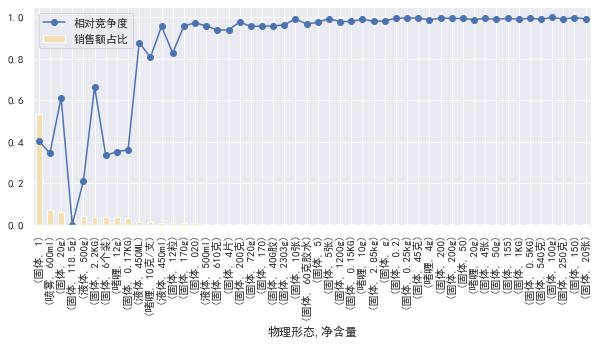

In [256]:
# 画图
draw(mouse0_50_state_unit, False)

In [257]:

# 当物理形态为固体，净含量为1的，销售额最高
# 物理形态为固体，净含量为118.5g的， 竞争度为0，竞争最小


### 竞品分析

In [259]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\商品销售数据')

In [260]:
files = glob.glob('*')
files

['安速家居近30天销售数据.xlsx', '拜耳近30天销售数据.xlsx', '科凌虫控旗舰店近30天销售数据.xlsx']

In [261]:
# 安速
ansu = pd.read_excel(files[0])

# 拜耳
bayer = pd.read_excel(files[1])

# 科凌虫控
ke = pd.read_excel(files[2])


In [262]:
ansu.shape, bayer.shape, ke.shape

((45, 13), (15, 16), (27, 13))

In [263]:
# 安速 类目
ansu.类目.unique()

array(['灭鼠/杀虫剂', '空调清洁剂', '漱口水', '空气芳香剂', '蚊香液', '蚊香片'], dtype=object)

In [264]:
# 拜耳的类目
bayer.类目.unique()

array(['灭鼠/杀虫剂'], dtype=object)

In [265]:
# 科凌虫控
ke.类目.unique()

array(['灭鼠/杀虫剂', '灭鼠笼/捕鼠器', '其它园艺用品'], dtype=object)

In [266]:
bayer.columns

Index(['序号', '店铺名称', '商品名称', '商品ID', '主图链接', '商品链接', '商品原价', '商品售价', '30天销售量',
       '总销量', '类目', '物理形态', '型号', '净含量', '使用对象', '销售额'],
      dtype='object')

Text(0.5, 1.0, '科凌虫控')

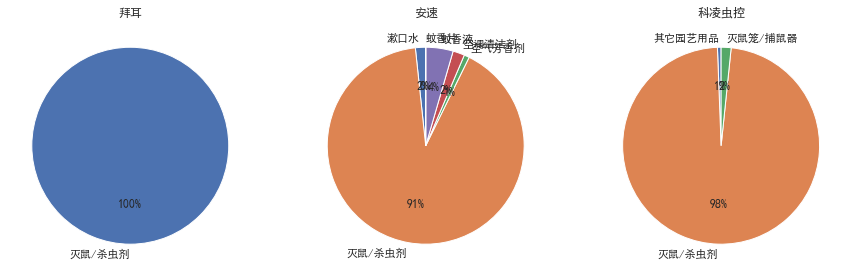

In [267]:
# 画图
# 1行3列
plt.figure(figsize=(3*5, 5)) 

axes1 = plt.subplot(1, 3, 1)
bayer.groupby(by='类目')['销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes1.set_ylabel('')
axes1.set_title('拜耳')


axes2 = plt.subplot(1, 3, 2)
ansu.groupby(by='类目')['30天销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes2.set_ylabel('')
axes2.set_title('安速')


axes3 = plt.subplot(1, 3, 3)
ke.groupby(by='类目')['30天销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes3.set_ylabel('')
axes3.set_title('科凌虫控')



In [268]:

# 可见拜耳只有一个市场，其他的有不同市场，但主要市场都是灭鼠杀虫剂


#### 分析各家的适用对象的分布

In [269]:
bayer.head()
ansu.head()
ke.head()

,序号,店铺名称,商品名称,商品ID,主图链接,商品链接,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,1,科凌虫控旗舰店,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,541418255867,http://img.alicdn.com/bao/uploaded/i1/28323986...,https://detail.m.tmall.com/item.htm?id=5414182...,49.9,16.8,76608,3175991,灭鼠/杀虫剂,蟑螂,1287014.4
1,2,科凌虫控旗舰店,蟑螂屋强力灭蟑清蟑螂贴家用无毒粉杀蟑螂药胶饵捕捉器克星全窝端,528722144927,http://img.alicdn.com/bao/uploaded/i1/28323986...,https://detail.m.tmall.com/item.htm?id=5287221...,39.0,19.8,5852,174989,灭鼠/杀虫剂,蟑螂,115869.6
2,3,科凌虫控旗舰店,科凌虫控蟑螂药屋蟑螂克星杀蟑胶饵灭蟑螂粉全窝端家用强力灭蟑清,545526161662,http://img.alicdn.com/bao/uploaded/i2/28323986...,https://detail.m.tmall.com/item.htm?id=5455261...,49.9,39.0,2497,74352,灭鼠/杀虫剂,蟑螂,97383.0
3,4,科凌虫控旗舰店,米面蛾诱捕器蛾子粘捕器家用小飞虫杀虫剂灭飞蛾除米蛾衣蛾蚋蛾蠓,536261470312,http://img.alicdn.com/bao/uploaded/i4/28323986...,https://detail.m.tmall.com/item.htm?id=5362614...,49.0,29.8,540,76572,灭鼠/杀虫剂,蛾,16092.0
4,5,科凌虫控旗舰店,粘鼠板超强力驱老鼠贴灭鼠抓老鼠夹药捕鼠器黏老鼠胶沾鼠神器家用,553350699341,http://img.alicdn.com/bao/uploaded/i3/28323986...,https://detail.m.tmall.com/item.htm?id=5533506...,48.9,13.8,6408,324171,灭鼠/杀虫剂,鼠,88430.4


Text(0.5, 1.0, '科凌虫控')

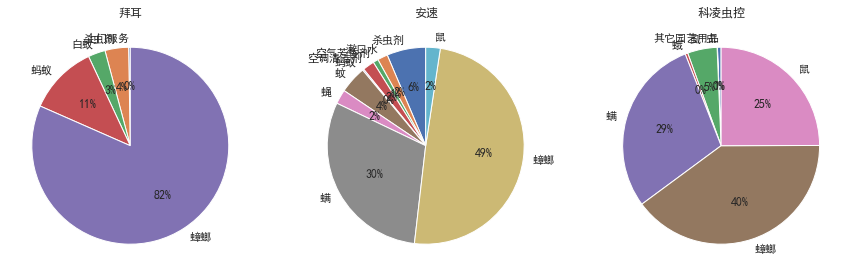

In [270]:
# 适用对象
# 1行3列
plt.figure(figsize=(3*5, 5)) 

axes1 = plt.subplot(1, 3, 1)
bayer.groupby(by='使用对象')['销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes1.set_ylabel('')
axes1.set_title('拜耳')

axes2 = plt.subplot(1, 3, 2)
ansu.groupby(by='适用对象')['30天销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes2.set_ylabel('')
axes2.set_title('安速')

axes3 = plt.subplot(1, 3, 3)
ke.groupby(by='适用对象')['30天销售额'].sum().plot(kind='pie', autopct='%.f%%', startangle=90)
axes3.set_ylabel('')
axes3.set_title('科凌虫控')


In [271]:
# 拜耳: 主要是蟑螂，少量是蚂蚁
# 安速： 蟑螂和螨
# 科凌虫控：蟑螂，螨虫，老鼠


### 商品交易数据

In [273]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\商品交易数据')

In [274]:
files = glob.glob('*')
files

['安速全店商品交易数据.xlsx', '拜耳全店商品交易数据.xlsx', '科凌虫控全店商品交易数据.xlsx']

In [275]:
# 先分析 拜耳交易数据

bayer = pd.read_excel(files[1])
bayer.head()

,品牌,时间,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,拜耳,2018-07-01,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,1,583483,0.0350,1500,趋势分析,9354158.37
1,拜耳,2018-07-01,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,6,278542,0.1258,1194,趋势分析,2470202.91
2,拜耳,2018-07-01,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,11,212329,0.5070,1328,趋势分析,1518114.06
3,拜耳,2018-07-01,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,44,107697,-0.2044,1117,趋势分析,451897.06
4,拜耳,2018-07-01,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,45,105901,-0.2134,936,趋势分析,438583.74


In [276]:
bayer.商品.nunique()

44

In [277]:
bayer.shape

(142, 9)

In [278]:
# 交易增长幅度
bayer2 = bayer.groupby(by='商品')[['交易增长幅度']].mean()

In [279]:
bayer2

,交易增长幅度
商品,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600


In [280]:
# 交易金额
bayer2['交易金额'] = bayer.groupby(by='商品')[['交易金额']].sum()
bayer2

,交易增长幅度,交易金额
商品,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.58
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600,236386.32


In [281]:
# 交易金额占比
bayer2['交易金额占比'] = bayer2['交易金额'] / bayer2['交易金额'].sum()
bayer2

,交易增长幅度,交易金额,交易金额占比
商品,,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.58,0.003104
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,0.018346
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97,0.495473
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600,236386.32,0.002920


In [282]:
# 商品个数
bayer2['商品个数'] = bayer.groupby(by='商品')[['品牌']].count()
bayer2.head()

,交易增长幅度,交易金额,交易金额占比,商品个数
商品,,,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1


In [283]:
# 把商品作为列

bayer2.reset_index(inplace=True)


In [284]:
bayer2.head()

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1


In [285]:
# 查看数据信息

bayer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   商品      44 non-null     object 
 1   交易增长幅度  44 non-null     float64
 2   交易金额    44 non-null     float64
 3   交易金额占比  44 non-null     float64
 4   商品个数    44 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ KB


In [286]:
bayer2.describe([.75, .90, .95, .99])

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,25.539933,1.839560e+06,0.022727,3.227273
std,155.083825,6.321050e+06,0.078095,1.668639
min,-0.292100,2.255362e+04,0.000279,1.000000
50%,0.109000,2.061879e+05,0.002547,3.000000
75%,1.287410,7.673291e+05,0.009480,5.000000
90%,6.717030,2.579050e+06,0.031863,5.000000
95%,26.051560,5.749385e+06,0.071032,5.000000
99%,600.523955,2.871464e+07,0.354762,5.000000
max,1030.000000,4.010385e+07,0.495473,5.000000


In [287]:
# 盖帽法

# 交易增长幅度：市场增长率
# 交易金额占比：市场份额

# 交易增长幅度：>90% 的数据我们认为是异常值


In [288]:
# 盖帽法
#    设置一个阈值（帽子），让最大值也只能是阈值
#    如果数大于阈值，则修改该数为阈值（不删除）

# 分位数
# 90： 表示90%的位置
# np.percentile(bayer2.交易增长幅度, 90)

# 分位数
# q=0.5 默认是50%位置
bayer2.交易增长幅度.quantile(q=0.9)


6.7170300000000065

In [289]:
bayer2.head()

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1


In [290]:
# 盖帽法：来处理交易增长幅度

thred = bayer2.交易增长幅度.quantile(q=0.9)
cond = bayer2.交易增长幅度 > thred
cond

bayer2.loc[cond, '交易增长幅度'] = thred


In [291]:
bayer2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,1.171668,1.839560e+06,0.022727,3.227273
std,2.212537,6.321050e+06,0.078095,1.668639
min,-0.292100,2.255362e+04,0.000279,1.000000
25%,-0.061040,6.828508e+04,0.000844,1.750000
50%,0.109000,2.061879e+05,0.002547,3.000000
75%,1.287410,7.673291e+05,0.009480,5.000000
max,6.717030,4.010385e+07,0.495473,5.000000


In [292]:
# 盖帽法：对交易金额处理

thred = bayer2.交易金额.quantile(q=0.9)
cond = bayer2.交易金额 > thred
bayer2.loc[cond, '交易金额'] = thred


In [293]:
# 重新计算 交易金额占比

bayer2['交易金额占比'] = bayer2.交易金额 / bayer2.交易金额.sum()


In [294]:
bayer2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,1.171668,6.231250e+05,0.022727,3.227273
std,2.212537,8.363866e+05,0.030506,1.668639
min,-0.292100,2.255362e+04,0.000823,1.000000
25%,-0.061040,6.828508e+04,0.002491,1.750000
50%,0.109000,2.061879e+05,0.007520,3.000000
75%,1.287410,7.673291e+05,0.027987,5.000000
max,6.717030,2.579050e+06,0.094066,5.000000


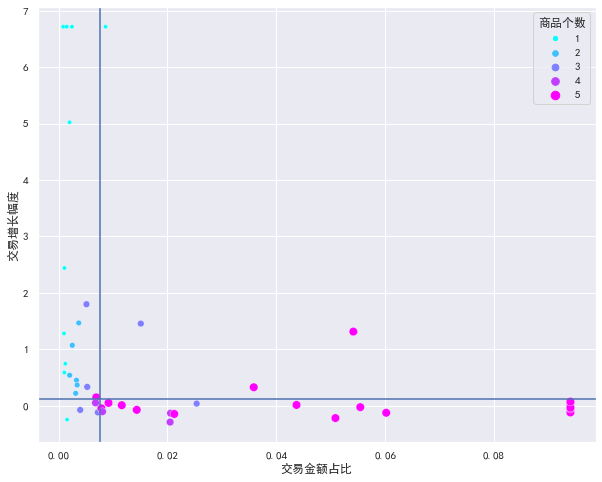

In [295]:
# 画图： 波士顿矩阵

# 交易增长幅度：市场增长率，作为Y轴
# 交易金额占比：市场份额，作为X轴

plt.figure(figsize=(10, 8))

# 画散点图
sns.scatterplot(
    data=bayer2,
    x='交易金额占比',
    y='交易增长幅度',
    hue='商品个数',
    size='商品个数',
    palette='cool'
)

# 画分割线
plt.axhline(bayer2.交易增长幅度.quantile(0.5))  # 水平线

plt.axvline(bayer2.交易金额占比.quantile(0.5))  # 垂直线


In [296]:
# 找出上图哪些产品是问题类，瘦狗类，明显类，奶牛类

bayer2.head()

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.001544,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.007199,3
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.050872,5
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000975,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.001057,1


In [297]:
# 中间线的位置
growth_q5 = bayer2.交易增长幅度.quantile(0.5)
money_q5 = bayer2.交易金额占比.quantile(0.5)

growth = bayer2.交易增长幅度
money = bayer2.交易金额占比

In [298]:
# 明星类产品
# (money > money_q5) & (growth > growth_q5)

star = bayer2[(money > money_q5) & (growth > growth_q5)]
star

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
6,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,0.054161,5
8,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,6.717030,236386.32,0.008622,1
20,德国拜耳除敌杀虫剂灭蟑螂药跳蚤苍蝇臭虫除螨虱子喷雾5ml*8,0.325580,983199.69,0.035860,5
25,拜耳拜灭士 蟑螂药家用全窝端 强力灭除厨房蟑螂屋克星杀德国进口,1.454067,413902.42,0.015096,3


In [299]:
# 问题类产品

question = bayer2[(money < money_q5) & (growth > growth_q5)]
question

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000975,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.001057,1
9,德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.450550,89566.01,0.003267,2
11,德国拜耳拜灭易进口蚂蚁药一窝端灭蚁饵剂清除蚂蚁粉家用全窝端,6.717030,32246.39,0.001176,1
12,德国拜耳白蚁药杀虫剂全窝端家用除杀防治灭飞蚂蚁特密得预防装修,5.023800,55113.41,0.002010,1
13,德国拜耳蟑螂药拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑加量装12g,1.069050,68699.06,0.002506,2
17,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁无毒家用室内全窝端,0.364950,93400.98,0.003407,2
21,德国进口拜耳蟑螂药拜灭士杀灭除蟑胶饵剂粉屋家用全窝端12g*2盒,0.586000,28605.01,0.001043,1
22,德国进口拜耳蟑螂药拜灭士杀蟑胶饵5g两盒套装全窝端杀灭蟑螂剂屋,0.147040,189376.20,0.006907,5
24,拜灭士蟑螂药蟑螂克星家用无毒强力灭蟑清德国拜耳杀蟑饵剂全窝端,1.797267,140032.47,0.005107,3


In [300]:
# 奶牛类产品

cow = bayer2[(money > money_q5) & (growth < growth_q5)]
cow

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.590,0.050872,5
5,德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.580,0.009163,5
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,2579050.243,0.094066,5
10,德国拜耳拜灭易灭蚁饵剂粉除杀防蚂蚁药杀虫剂全窝端家用室内花园,-0.027300,1520126.150,0.055444,5
14,德国拜耳跳蚤杀虫剂家用潮虫灭蛾蚋虱子臭虫药除蟑螂5ml*4,0.007220,318059.430,0.011601,5
15,德国拜耳进口白蚁药除灭防杀白蚁杀虫剂全窝端家用特傚触杀型粉药,-0.134425,564169.770,0.020577,4
16,德国拜耳进口蚂蚁药家用拜灭易灭蚁饵剂杀蚂蚁杀虫剂室内全窝端蚁,-0.047140,214998.610,0.007842,5
18,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,-0.056240,2579050.243,0.094066,5
19,德国拜耳除敌杀虫剂灭蚊蟑螂蚂蚁药跳蚤苍蝇臭虫除螨虱子家用,-0.075440,393582.710,0.014355,5
23,必抢 德国进口拜耳蟑螂克星家用小强全窝端蟑螂药杀蟑胶饵灭蟑17g,-0.292100,561689.930,0.020487,4


In [301]:
# 瘦狗类产品

dog = bayer2[(money < money_q5) & (growth < growth_q5)]
dog

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.001544,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.007199,3
34,进口拜耳蚂蚁药家用花园灭蚁饵剂拜灭易除杀蚂蚁杀虫剂室内全窝端,-0.077033,108487.45,0.003957,3
37,进口蟑螂药 德国拜耳拜灭士杀蟑胶饵灭蟑螂屋贴捕捉器全窝端家用,0.049250,185691.26,0.006773,4


In [302]:
# 问题产品和奶牛产品的商品个数普遍比较多
# 没有突出的明星产品, 但是有快进入明星产品的问题产品

#总结:拜耳大部分产品集中在除蟑上,杀虫也有一定的规模, 
#       但是明星产品略乏力, 可以进一步发展问题产品灭鼠为明星产品

### 安速的产品结构

In [303]:
# 安速的数据
ansu = pd.read_excel(files[0])
ansu.head()

,日期,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,2018-07-01,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,3,310517,0.6037,1445,趋势分析,3002740.75
1,2018-07-01,日本进口安速小强恢恢灭蟑螂屋药无毒捕捉器克星家用强力清全窝端,25,151749,-0.2359,1200,趋势分析,832540.52
2,2018-07-01,日本进口安速小强恢恢杀蟑灭蟑螂屋10枚捕捉器不含蟑螂药,47,101501,0.1988,1192,趋势分析,406717.67
3,2018-07-01,日本安速小强恢恢蟑螂屋家用杀蟑胶饵小蟑螂药无毒蟑螂克星全窝端,71,87765,-0.0050,1414,趋势分析,314177.52
4,2018-07-01,✅【10枚装】日本进口安速小强恢恢蟑螂屋捕捉器杀药贴家用全窝端,85,76738,0.0724,1841,趋势分析,247647.47


In [304]:
# 封装
def gen_data(df):
    # 交易增长幅度
    df2 = df.groupby(by='商品')[['交易增长幅度']].mean()
    # 交易金额
    df2['交易金额'] = df.groupby(by='商品')[['交易金额']].sum()
    # 交易金额占比
    df2['交易金额占比'] = df2['交易金额'] / df2['交易金额'].sum()
    # 商品个数
    df2['商品个数'] = df.groupby(by='商品')[['日期']].count()
    # 把商品作为列
    df2.reset_index(inplace=True)
    
    return df2

In [305]:
ansu2 = gen_data(ansu)
ansu2.head(3)

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,10枚装日本进口安速小强恢恢蟑螂屋诱捕捉器杀药贴环保无毒包邮,0.17675,217061.51,0.007203,4
1,✅【10枚装】日本进口安速小强恢恢蟑螂屋捕捉器杀药贴家用全窝端,-0.15978,812113.82,0.026948,5
2,【20枚装】日本进口安速小强恢恢蟑螂屋蟑螂捕捉器诱捕器灭蟑小屋,0.93215,58785.41,0.001951,2


In [306]:
ansu2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,49.000000,4.900000e+01,49.000000,49.000000
mean,1.831989,6.150227e+05,0.020408,2.877551
std,6.706975,1.954368e+06,0.064851,1.666241
min,-0.641300,1.916612e+04,0.000636,1.000000
25%,-0.059500,4.044140e+04,0.001342,1.000000
50%,0.176750,1.162554e+05,0.003858,3.000000
75%,0.604900,4.153983e+05,0.013784,5.000000
max,42.014300,1.329498e+07,0.441164,5.000000


In [307]:
# 盖帽：封装函数
# 同时对： 交易增长幅度，交易金额做盖帽
#               交易金额占比重新计算

def mask(df, q=0.9):
    thred = df.交易增长幅度.quantile(q=q)
    cond = df.交易增长幅度 > thred
    df.loc[cond, '交易增长幅度'] = thred
    
    thred2 = df.交易金额.quantile(q=q)
    cond2 = df.交易金额 > thred2
    df.loc[cond2, '交易金额'] = thred2

    # 重新计算 交易金额占比
    df['交易金额占比'] = df.交易金额 / df.交易金额.sum()


In [308]:
mask(ansu2)

In [309]:
ansu2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,49.000000,49.000000,49.000000,49.000000
mean,0.593263,270283.667755,0.020408,2.877551
std,1.160903,300856.756131,0.022717,1.666241
min,-0.641300,19166.120000,0.001447,1.000000
25%,-0.059500,40441.400000,0.003054,1.000000
50%,0.176750,116255.350000,0.008778,3.000000
75%,0.604900,415398.340000,0.031365,5.000000
max,3.530507,889206.876000,0.067141,5.000000


In [310]:
# 画图: 波士顿矩阵图

def draw_boston(df, q=0.5):
    # 画图： 波士顿矩阵
    # 交易增长幅度：市场增长率，作为Y轴
    # 交易金额占比：市场份额，作为X轴

    plt.figure(figsize=(10, 8))

    # 画散点图
    sns.scatterplot(
        data=df,
        x='交易金额占比',
        y='交易增长幅度',
        hue='商品个数',
        size='商品个数',
        palette='cool'
    )

    # 画分割线
    plt.axhline(df.交易增长幅度.quantile(q=q))  # 水平线
    plt.axvline(df.交易金额占比.quantile(q=q))  # 垂直线
    
    # 画数字
    for i in df.index:
        # print(i, end=' ')
        
        plt.text(
            x=df.loc[i, '交易金额占比']+0.0005, 
            y=df.loc[i, '交易增长幅度']-0.02,
            s=i+1,
            fontsize=10
        )

In [311]:
ansu2.shape, ansu2.index

((49, 5), RangeIndex(start=0, stop=49, step=1))

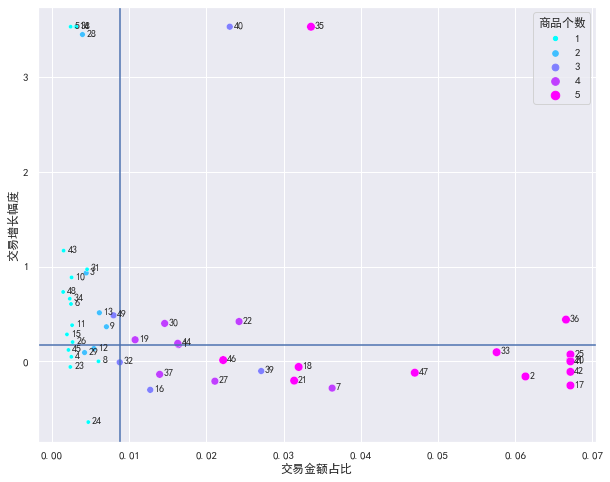

In [312]:
draw_boston(ansu2)

In [313]:
# 封装函数
# 得到：问题类产品，明显类产品，奶牛类产品

def get_product(df, q=0.5):
    # 中间线的位置
    growth_q5 = df.交易增长幅度.quantile(q=q)
    money_q5 = df.交易金额占比.quantile(q=q)

    growth = df.交易增长幅度
    money = df.交易金额占比
    
    # 问题类产品
    question = df[(money < money_q5) & (growth > growth_q5)]
    
    # 明显类产品
    star = df[(money > money_q5) & (growth > growth_q5)]

    # 奶牛类产品
    cow = df[(money > money_q5) & (growth < growth_q5)]
    
    return (question, star, cow)

In [314]:
question, star, cow =  get_product(ansu2)

In [315]:
question

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
2,【20枚装】日本进口安速小强恢恢蟑螂屋蟑螂捕捉器诱捕器灭蟑小屋,0.932150,58785.41,0.004439,2
4,冲销量日本安速小黑帽蟑螂屋蟑螂药家用强力灭蟑清安全无毒小强,3.530507,32034.34,0.002419,1
5,原装正品日本安速小强恢恢蟑螂屋蟑螂捕捉器诱捕器小屋20枚包邮,0.604900,32627.73,0.002464,1
8,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁无毒家用室内全窝端,0.364950,93400.98,0.007052,2
9,日本 安速EARTH小果蝇恢恢杀蝇饵剂灭苍蝇小飞虫神器诱捕捕捉器,0.885600,33633.57,0.002540,1
10,日本ARS安速小黑帽环保无毒灭蟑螂药无味除小强小黑屋12枚,0.381200,34503.54,0.002605,1
12,日本ARS安速小黑帽蟑螂屋盒子无毒无味灭小强安全室内12枚蟑螂药,0.512350,81303.15,0.006139,2
13,日本安速ARS地球制药earth小飞虫恢恢果蝇诱捕器单只装 0315,3.530507,40441.40,0.003054,1
14,日本安速小强恢恢蟑螂屋20片蟑螂药灭蟑螂克星家用全窝端,0.284000,25693.46,0.001940,1
25,日本安速小黑帽蟑螂屋灭蟑螂药家用厨房灭蟑清蟑螂克星全窝端无毒,0.203100,35358.87,0.002670,1


In [316]:
star

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
18,日本安速小强恢恢蟑螂屋灭蟑螂强力捕捉器诱捕器除杀蟑螂清药贴,0.227425,142604.89,0.010768,4
21,日本安速小黑帽小强黑克杀蟑饵剂9枚 蟑螂药屋蟑螂克星家用全窝端,0.419900,320927.90,0.024232,4
29,日本安速红阿斯杀虫烟雾剂20g弹烟熏灭跳蚤蟑螂药克星家用全窝端,0.399800,193282.28,0.014594,4
34,日本安速蚂蚁药灭蚂蚁清驱除杀红蚂蚁小黄蚂蚁全窝端家用室内花园,3.530507,444230.43,0.033542,5
35,日本安速蟑螂小屋灭除杀蟑螂药一窝端神器捕捉器家用克星小强恢恢,0.440000,881587.79,0.066566,5
39,日本进口安速天然除螨喷雾剂350ml床上免洗家用正品螨虫非除杀菌,3.530507,304915.11,0.023023,3
43,日本进口安速小强恢恢蟑螂屋5片药捕捉器灭杀蟑螂克星家用全窝端,0.189600,215689.30,0.016286,4


In [317]:
cow

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
1,✅【10枚装】日本进口安速小强恢恢蟑螂屋捕捉器杀药贴家用全窝端,-0.159780,812113.820,0.061320,5
6,原装进口日本安速红阿斯杀虫烟雾剂熏杀灭跳蚤臭虫螨虫蟑螂20克,-0.283000,480525.860,0.036283,4
15,日本安速小强恢恢蟑螂屋6片家用无毒蟑螂贴捕捉器克星家用全窝端,-0.301267,168503.430,0.012723,3
16,日本安速小强恢恢蟑螂屋家用杀蟑胶饵小蟑螂药无毒蟑螂克星全窝端,-0.254840,889206.876,0.067141,5
17,日本安速小强恢恢蟑螂屋捕捉器神器厨房清灭强力贴克星家用全窝端,-0.059500,423102.790,0.031947,5
19,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,0.012180,889206.876,0.067141,5
20,日本安速小强恢恢蟑螂屋药6片 无毒捕捉器强力灭清克星家用全窝端,-0.203980,415398.340,0.031365,5
24,日本安速小黑帽蟑螂屋家用强力灭蟑螂药环保无毒无味除小强包邮,0.072400,889206.876,0.067141,5
26,日本安速小黑帽蟑螂屋蟑螂药克星家用安全无毒强力灭蟑清全窝端！,-0.209850,279383.030,0.021095,4
32,日本安速红阿斯烟雾杀虫剂灭跳蚤药烟弹家用神器螨虫克星送蟑螂屋,0.095920,762628.320,0.057583,5


### 科凌虫控 ：国产品牌

In [318]:
# 获取数据
ke = pd.read_excel(files[2])
ke.head()

,日期,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,2018-07-01,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,2,466881,0.4525,1850,趋势分析,6256693.23
1,2018-07-01,蟑螂屋捕捉器除灭蟑螂药一窝端神器纸盒子胶饵杀小蟑螂贴厨房家用,14,204545,0.1933,1577,趋势分析,1419883.88
2,2018-07-01,跳蚤杀虫剂家用厕所卫生间下水道除虫灭小飞虫蛾蚋蟑螂臭虫药室内,42,110415,0.0737,1197,趋势分析,472380.75
3,2018-07-01,杀蟑螂药一窝端蟑螂药粉家用捕捉器屋厨贴无毒灭蟑螂粉除小强克星,46,101833,-0.3667,1698,趋势分析,409084.82
4,2018-07-01,老鼠贴超强力粘鼠板灭鼠神器捕鼠魔毯yao颗粒老鼠胶家用药捕鼠器,56,93036,0.0310,1149,趋势分析,348435.13


In [319]:
# 处理数据
ke2 = gen_data(ke)
ke2

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,4 只装驱老鼠夹捕鼠器家用灭鼠神器抓杀扑老鼠夹子捉老鼠笼全自动,0.054800,289907.35,0.006233,5
1,去儿童头虱除阴虱净喷剂百部酊虱卵用虱子药成人一扫光净虱灵喷雾,0.670580,1112790.54,0.023924,5
2,天然除螨虫包喷雾剂中草药祛防杀去螨虫垫贴床上用品家用驱虫神器,407.982650,290170.09,0.006239,2
3,抓老鼠夹子捕鼠器笼家用连续全自动逮捉老鼠笼超强扑鼠笼灭鼠神器,0.073350,51645.49,0.001110,2
4,抓老鼠贴强力粘鼠板胶药沾灭鼠器捕鼠神器克星家用正品20张一窝端,4.219500,119948.74,0.002579,3
5,杀蟑螂药一窝端蟑螂药粉家用捕捉器屋厨贴无毒灭蟑螂粉除小强克星,-0.193700,1408637.81,0.030285,5
6,汽车家用驱鼠剂防老鼠克星喷雾剂耗子发动机舱包防鼠灭鼠药驱鼠器,0.137300,25665.98,0.000552,1
7,灭小飞蛾杀虫剂粘捕器除衣蛾黏杀蛾子蛾蠓贴米面蛾米蛾诱捕器家用,-0.009833,175024.36,0.003763,3
8,灭蟑螂药烟剂杀蜘蛛驱烟雾弹神器克星家用全窝端除蚂蚁蜈蚣烟熏片,-0.041160,424747.11,0.009132,5
9,灭蟑螂药粉笔神器除跳蚤粉全窝端家用无毒厨房杀蚂蚁神奇药笔克星,-0.248860,324119.15,0.006968,5


In [320]:
ke2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,31.000000,3.100000e+01,31.000000,31.000000
mean,13.479448,1.500410e+06,0.032258,3.806452
std,73.221448,4.039568e+06,0.086849,1.558190
min,-0.317840,2.566598e+04,0.000552,1.000000
25%,-0.065360,1.099735e+05,0.002364,2.500000
50%,0.054800,3.286985e+05,0.007067,5.000000
75%,0.552800,1.138542e+06,0.024478,5.000000
max,407.982650,2.196606e+07,0.472259,5.000000


In [321]:
# 盖帽
mask(ke2)

In [322]:
ke2.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,31.000000,3.100000e+01,31.000000,31.000000
mean,0.263058,6.785949e+05,0.032258,3.806452
std,0.492999,6.974319e+05,0.033154,1.558190
min,-0.317840,2.566598e+04,0.001220,1.000000
25%,-0.065360,1.099735e+05,0.005228,2.500000
50%,0.054800,3.286985e+05,0.015625,5.000000
75%,0.552800,1.138542e+06,0.054122,5.000000
max,1.268350,2.074887e+06,0.098633,5.000000


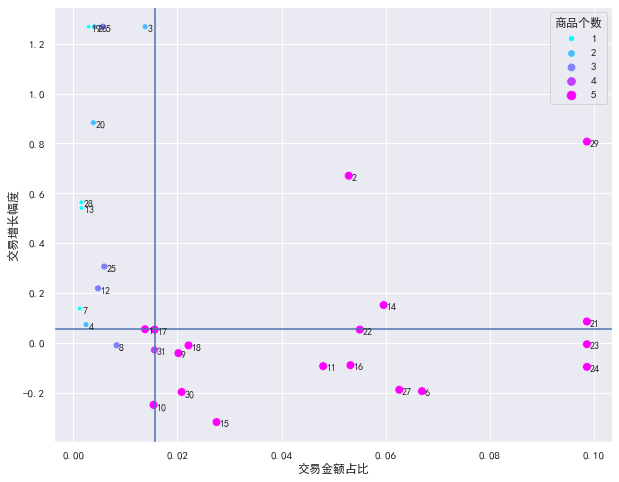

In [323]:
# 画图
draw_boston(ke2)

In [324]:
question, star, cow = get_product(ke2)

In [325]:
question

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
2,天然除螨虫包喷雾剂中草药祛防杀去螨虫垫贴床上用品家用驱虫神器,1.26835,290170.09,0.013794,2
3,抓老鼠夹子捕鼠器笼家用连续全自动逮捉老鼠笼超强扑鼠笼灭鼠神器,0.07335,51645.49,0.002455,2
4,抓老鼠贴强力粘鼠板胶药沾灭鼠器捕鼠神器克星家用正品20张一窝端,1.26835,119948.74,0.005702,3
6,汽车家用驱鼠剂防老鼠克星喷雾剂耗子发动机舱包防鼠灭鼠药驱鼠器,0.13730,25665.98,0.001220,1
11,科凌虫控老鼠贴超强力粘鼠板日本版捉抓老鼠夹胶家用灭鼠药捕鼠器,0.21870,99998.35,0.004754,3
12,科凌虫控蟑螂药南方大蟑螂强力杀蟑饵剂蟑螂胶饵家用全窝端灭蟑清,0.54140,32057.62,0.001524,1
18,老鼠笼捕鼠器家用一窝端连续全自动强力扑捉抓灭老鼠夹子捕鼠神器,1.26835,62508.93,0.002971,1
19,老鼠贴强力粘鼠板正品一窝端灭鼠器老鼠克星胶yao颗粒家用10片装,0.88335,81123.80,0.003856,2
24,蟑螂药粉德国小蠊小强专杀灭蟑螂屋纸盒子家用蟑螂克星全窝端厨房,0.30630,125300.73,0.005956,3
25,蟑螂药蟑螂克星家用非无毒全窝端室内厨房南方大蟑螂一窝端脏螂药,1.26835,86020.53,0.004089,2


In [326]:
star

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
1,去儿童头虱除阴虱净喷剂百部酊虱卵用虱子药成人一扫光净虱灵喷雾,0.67058,1112790.54,0.052898,5
13,科凌虫控蟑螂药屋蟑螂克星杀蟑胶饵灭蟑螂粉全窝端家用强力灭蟑清,0.15184,1253677.00,0.059595,5
20,老鼠贴超强力粘鼠板灭鼠神器捕鼠魔毯yao颗粒老鼠胶家用药捕鼠器,0.08576,2074886.77,0.098633,5
28,除螨虫家用喷剂床上祛防螨去螨虫神器喷雾剂包贴杀虫剂免洗非杀菌,0.80742,2074886.77,0.098633,5


In [327]:
cow

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
5,杀蟑螂药一窝端蟑螂药粉家用捕捉器屋厨贴无毒灭蟑螂粉除小强克星,-0.19370,1408637.81,0.066962,5
8,灭蟑螂药烟剂杀蜘蛛驱烟雾弹神器克星家用全窝端除蚂蚁蜈蚣烟熏片,-0.04116,424747.11,0.020191,5
10,科凌虫控杀蟑螂药一窝端灭蟑螂胶饵药粉克星南方大蟑螂全窝端家用,-0.09338,1009419.11,0.047984,5
14,米面蛾诱捕器蛾子粘捕器家用小飞虫杀虫剂灭飞蛾除米蛾衣蛾蚋蛾蠓,-0.31784,578549.20,0.027502,5
15,粘鼠板超强力驱老鼠贴灭鼠抓老鼠夹药捕鼠器黏老鼠胶沾鼠神器家用,-0.08956,1119499.65,0.053217,5
17,老鼠笼捕鼠器全自动超强家用抓老鼠夹药捉耗子连续灭鼠神器驱鼠器,-0.01008,465621.51,0.022134,5
21,蟑螂屋强力灭蟑清蟑螂贴家用无毒粉杀蟑螂药胶饵捕捉器克星全窝端,0.05320,1157585.18,0.055028,5
22,蟑螂屋捕捉器除灭蟑螂药一窝端神器纸盒子胶饵杀小蟑螂贴厨房家用,-0.00548,2074886.77,0.098633,5
23,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,-0.09628,2074886.77,0.098633,5
26,跳蚤杀虫剂家用厕所卫生间下水道除虫灭小飞虫蛾蚋蟑螂臭虫药室内,-0.18824,1316871.08,0.062600,5


## 流量分析

In [329]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\流量渠道数据')

In [330]:
files = glob.glob('*')
files

['安速家居旗舰店流量渠道.xlsx', '拜耳官方旗舰店流量渠道.xlsx', '科凌虫控旗舰店流量渠道.xlsx']

### 拜耳

In [331]:
bayer = pd.read_excel(files[1])
bayer.head()

,流量来源,交易指数,交易指数.1,Unnamed: 3
0,淘内免费,399466,320128,NaN
1,手淘搜索,336457,274916,NaN
2,淘内免费其他,195308,153255,NaN
3,手淘问大家,123512,108108,NaN
4,手淘旺信,88024,59198,NaN


In [332]:
# 降序
bayer.sort_values(by='交易指数', ascending=False, inplace=True)

In [333]:
bayer.head(10)

,流量来源,交易指数,交易指数.1,Unnamed: 3
0,淘内免费,399466,320128,NaN
1,手淘搜索,336457,274916,NaN
206,自主访问,312587,234293,NaN
207,购物车,251600,186323,NaN
210,付费流量,223315,206480,NaN
208,我的淘宝,205162,151825,NaN
2,淘内免费其他,195308,153255,NaN
211,直通车,187952,147463,NaN
3,手淘问大家,123512,108108,NaN
212,淘宝客,98692,135320,NaN


In [334]:
# 取前10名
bayer_top10 = bayer.head(10).copy()
bayer_top10

,流量来源,交易指数,交易指数.1,Unnamed: 3
0,淘内免费,399466,320128,NaN
1,手淘搜索,336457,274916,NaN
206,自主访问,312587,234293,NaN
207,购物车,251600,186323,NaN
210,付费流量,223315,206480,NaN
208,我的淘宝,205162,151825,NaN
2,淘内免费其他,195308,153255,NaN
211,直通车,187952,147463,NaN
3,手淘问大家,123512,108108,NaN
212,淘宝客,98692,135320,NaN


In [335]:
# 交易指数占比
bayer_top10['交易指数占比'] = bayer_top10.交易指数 / bayer_top10.交易指数.sum()

In [336]:
bayer_top10

,流量来源,交易指数,交易指数.1,Unnamed: 3,交易指数占比
0,淘内免费,399466,320128,NaN,0.171147
1,手淘搜索,336457,274916,NaN,0.144152
206,自主访问,312587,234293,NaN,0.133925
207,购物车,251600,186323,NaN,0.107795
210,付费流量,223315,206480,NaN,0.095677
208,我的淘宝,205162,151825,NaN,0.087900
2,淘内免费其他,195308,153255,NaN,0.083678
211,直通车,187952,147463,NaN,0.080526
3,手淘问大家,123512,108108,NaN,0.052917
212,淘宝客,98692,135320,NaN,0.042284


In [337]:
# 把 流量来源 作为行索引
bayer_top10.set_index(keys='流量来源', inplace=True)

In [338]:
bayer_top10

,交易指数,交易指数.1,Unnamed: 3,交易指数占比
流量来源,,,,
淘内免费,399466,320128,NaN,0.171147
手淘搜索,336457,274916,NaN,0.144152
自主访问,312587,234293,NaN,0.133925
购物车,251600,186323,NaN,0.107795
付费流量,223315,206480,NaN,0.095677
我的淘宝,205162,151825,NaN,0.087900
淘内免费其他,195308,153255,NaN,0.083678
直通车,187952,147463,NaN,0.080526
手淘问大家,123512,108108,NaN,0.052917


In [339]:
# 付费流量
pay = ['付费流量',  '直通车',  '淘宝客']

In [340]:
explode = np.array([True  if index in pay  else False      for index in bayer_top10.index ])
explode

array([False, False, False, False,  True, False, False,  True, False,
        True])

 前10流量中：总交易指数：2334051; 付费流量占比: 21.85 %; 付费流量带来的交易指数: 509959.0


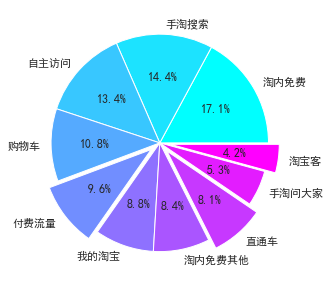

In [341]:
# 画图

bayer_top10.交易指数占比.plot(kind='pie',
                                                  figsize=(5, 5),
                                                  autopct='%.1f%%',
                                                  cmap='cool',
                                                  explode=explode*0.1
                                               )

plt.ylabel('')


# 计算机：总交易指数， 付费流量占比， 付费流量带来的交易指数
 #  总交易指数
total = bayer_top10.交易指数.sum()  

# 付费流量占比
cond = explode
pay_ratio = bayer_top10.loc[cond, '交易指数占比'].sum()   

# 付费流量带来的交易指数
pay_total = total * pay_ratio

print(f' 前10流量中：总交易指数：{total}; '
        f'付费流量占比: { "%.2f %%" % (pay_ratio*100) }; '
        f'付费流量带来的交易指数: {pay_total}')

### 安速

In [342]:
ansu = pd.read_excel(files[0])
ansu.head()

,流量来源,交易指数
0,淘内免费,119751
1,手淘搜索,86389
2,淘内免费其他,62653
3,手淘问大家,31348
4,手淘旺信,25514


In [343]:
# 取前10名
# 降序
ansu.sort_values(by='交易指数', ascending=False, inplace=True)

# 取前10个
ansu_top10 = ansu.head(10).copy()

In [344]:
ansu_top10

,流量来源,交易指数
0,淘内免费,119751
206,自主访问,104136
1,手淘搜索,86389
210,付费流量,83819
207,购物车,82687
208,我的淘宝,68529
2,淘内免费其他,62653
211,直通车,55229
213,品销宝-搜索产品,50425
5,猫客搜索,34921


In [345]:
# 交易指数占比
ansu_top10['交易指数占比'] = ansu_top10.交易指数 / ansu_top10.交易指数.sum()

In [346]:
ansu_top10

,流量来源,交易指数,交易指数占比
0,淘内免费,119751,0.159980
206,自主访问,104136,0.139119
1,手淘搜索,86389,0.115410
210,付费流量,83819,0.111977
207,购物车,82687,0.110465
208,我的淘宝,68529,0.091550
2,淘内免费其他,62653,0.083700
211,直通车,55229,0.073782
213,品销宝-搜索产品,50425,0.067365
5,猫客搜索,34921,0.046652


In [347]:
# 把 流量来源 作为行索引
ansu_top10.set_index(keys='流量来源', inplace=True)

In [348]:
# 画图
def draw_flow(df, pay=['付费流量',  '直通车', '淘宝客']):
    
    explode = np.array([True  if index in pay  else False      for index in df.index ])

    # 画图
    df.交易指数占比.plot(kind='pie',
                                  figsize=(5, 5),
                                  autopct='%.1f%%',
                                  cmap='cool',
                                  explode=explode*0.1
                               )
    plt.ylabel('')


    # 计算机：总交易指数， 付费流量占比， 付费流量带来的交易指数
     #  总交易指数
    total = df.交易指数.sum()  

    # 付费流量占比
    cond = explode
    pay_ratio = df.loc[cond, '交易指数占比'].sum()   

    # 付费流量带来的交易指数
    pay_total = total * pay_ratio

    print(f' 前10流量中：总交易指数：{total}; '
            f'付费流量占比: { "%.2f %%" % (pay_ratio*100) }; '
            f'付费流量带来的交易指数: {pay_total}')
    
    

 前10流量中：总交易指数：748539; 付费流量占比: 18.58 %; 付费流量带来的交易指数: 139048.0


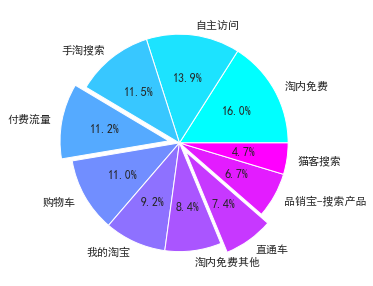

In [349]:
draw_flow(ansu_top10, pay=['付费流量',  '直通车'])

### 科凌虫控

In [350]:
ke = pd.read_excel(files[2])
ke.head()

,流量来源,交易指数
0,淘内免费,320128
1,手淘搜索,274916
2,淘内免费其他,153255
3,手淘问大家,108108
4,手淘旺信,59198


In [351]:
# 取前10个
ke.sort_values(by='交易指数', ascending=False, inplace=True)

ke_top10 = ke.head(10).copy()

# 交易指数占比
ke_top10['交易指数占比'] = ke_top10.交易指数 / ke_top10.交易指数.sum()

In [352]:
ke_top10.set_index(keys='流量来源', inplace=True)

 前10流量中：总交易指数：1918111; 付费流量占比: 25.51 %; 付费流量带来的交易指数: 489263.00000000006


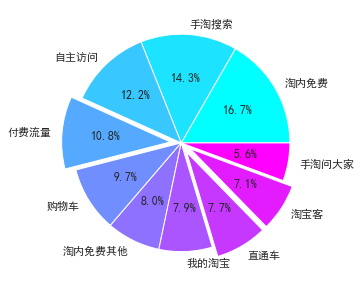

In [353]:
draw_flow(ke_top10)

In [354]:

# 拜耳在流量结构上更有优势， 
#  付费带来的收益最好


## 评论分析

In [355]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\评论舆情数据')


In [356]:
files = glob.glob('*')
files

['安速.xlsx', '德国拜耳.xlsx', '科林虫控.xlsx']

In [357]:
# 德国拜耳
bayer = pd.read_excel(files[1])
bayer

,产品名称,链接,评论页码,评论,评论日期
0,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...,2018-11-21 19:01:20
1,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...,2018-11-23 11:07:03
2,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑,2018-11-24 00:28:17
3,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...,2018-11-25 03:07:25
4,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？,2018-11-26 07:49:43
...,...,...,...,...,...
1395,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,69,此用户没有填写评论!,2018-10-26 15:18:29
1396,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,69,有点贵，已经用了，期待效果,2018-11-21 20:27:43
1397,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,69,物流挺快的客服也很贴心好评,2018-11-26 11:56:28
1398,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,69,看起来不错，暂时没发现蟑螂,2018-11-18 13:03:36


In [358]:
# 获取评论数据
comments = bayer.评论.values.tolist()
comments

['刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎',
 '朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全都点涂上了，四天之后回来开门的时候内心相当忐忑啊?? 不过居然一只都没见...也不知道是真的没有了，还是跟我错峰出行了....但愿是管用了，不然我真疯了！第二次购买了，超级好用，之前家里蟑螂都翻烂了，朋友推荐这个，买了两支送了一支，点上胶饵以后，',
 '真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑',
 '盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里不怕蟑螂的人处理的，所以我也不是很清楚&hellip;可以认真考虑家里常备啦，但是不太敢一次买很多，怕放不好变质了。还送了沉甸甸的一大包湿巾，很棒，可以用来给蟑螂尸体的地方消毒。',
 '我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？',
 '强力推荐，第三次购买了，好好用的说，一次囤够了一个夏天的量。拜耳值得买',
 '宝贝已经收到，厨房，大厅，房间所有的墙角都有打，没看到蟑螂的尸体，好像没什么效果，但感觉蟑螂没以前那么多了，目前还不知道效果到底如何，这是使用两天后的效果',
 '收到货好几天了，昨天才拿出来用，结果还是不错的哈，效果很好，第二天早上看到好几只蟑螂死在厨房，以后还会继续回购的。双十一价格也比较实惠，不然平时买实在是太贵了，一并买了蚂蚁药，还没有用，这个季节好像也不太适合使用，没看到几只蚂蚁。不知道有没有效',
 '买了蟑螂屋和拜耳，有几个小强的尸体。大部分都被蟑螂屋搞定了。双十一就是优惠，买2送2。拿两支给老妈用，希望能够干掉80%的小强。 哈哈，像鲨鱼一样干掉小强。',
 '以前几乎都没有认真评价过，不知道浪费了多少积 分。听说评价超过一百个字有送积分，基本上每 星期都会光顾，统一评论，淘宝购物实在是太方便 了，根本停不下来，从此后买生活用品第一个想到 的就是淘宝，都是正品，一开始还担心，现在都习 惯了，真心不错的，现在还要多多给优惠呦，

In [359]:
# 把所有评论 拼接在一起，变成一个字符串
comments_str = ''.join(comments)
comments_str

'刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全都点涂上了，四天之后回来开门的时候内心相当忐忑啊?? 不过居然一只都没见...也不知道是真的没有了，还是跟我错峰出行了....但愿是管用了，不然我真疯了！第二次购买了，超级好用，之前家里蟑螂都翻烂了，朋友推荐这个，买了两支送了一支，点上胶饵以后，真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里不怕蟑螂的人处理的，所以我也不是很清楚&hellip;可以认真考虑家里常备啦，但是不太敢一次买很多，怕放不好变质了。还送了沉甸甸的一大包湿巾，很棒，可以用来给蟑螂尸体的地方消毒。我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？强力推荐，第三次购买了，好好用的说，一次囤够了一个夏天的量。拜耳值得买宝贝已经收到，厨房，大厅，房间所有的墙角都有打，没看到蟑螂的尸体，好像没什么效果，但感觉蟑螂没以前那么多了，目前还不知道效果到底如何，这是使用两天后的效果收到货好几天了，昨天才拿出来用，结果还是不错的哈，效果很好，第二天早上看到好几只蟑螂死在厨房，以后还会继续回购的。双十一价格也比较实惠，不然平时买实在是太贵了，一并买了蚂蚁药，还没有用，这个季节好像也不太适合使用，没看到几只蚂蚁。不知道有没有效买了蟑螂屋和拜耳，有几个小强的尸体。大部分都被蟑螂屋搞定了。双十一就是优惠，买2送2。拿两支给老妈用，希望能够干掉80%的小强。 哈哈，像鲨鱼一样干掉小强。以前几乎都没有认真评价过，不知道浪费了多少积 分。听说评价超过一百个字有送积分，基本上每 星期都会光顾，统一评论，淘宝购物实在是太方便 了，根本停不下来，从此后买生活用品第一个想到 的就是淘宝，都是正品，一开始还担心，现在都习 惯了，真心不错的，现在还要多多给优惠呦，下次 还会再来的，都逛上了，哈啊哈哈哈哈。还是很不 错的宝贝真心不错，物超所值，很满意的一次

In [360]:
# 去除没有意义的字符：逗号，句号等
#  保留中英文，数字

import re

In [361]:
# re.sub(r'[^a-zA-Z0-9\u4E00-\u9FA5]', '')  # 替换
# \u4E00-\u9FA5 表示单个汉字

# ''.replace("abc", '')

comments2 = re.sub(r'[^a-zA-Z0-9\u4E00-\u9FA5]', '',  comments_str )
comments2

'刚收到家里厨房突然出现小强了看了这个评价挺多挺好销量也大赶紧定了三盒一定要管用啊一定要管用一定要管用准备看下后续效果会继续追加评价不知道多久才能消灭干净还在厨房没法做饭了都不愿意进去了有点担心会挥发看很多人在用也就试试吧哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎朋友推荐的说之前用的挺管用的在放药的前几天就没怎么见蟑螂了然后出去玩之前把家里角角落落全都点涂上了四天之后回来开门的时候内心相当忐忑啊不过居然一只都没见也不知道是真的没有了还是跟我错峰出行了但愿是管用了不然我真疯了第二次购买了超级好用之前家里蟑螂都翻烂了朋友推荐这个买了两支送了一支点上胶饵以后真心坑人啊还没到24小时就凝固了小强依然活跃盆友推荐的说特别好用效果杠杠的看双十一做活动就买啦效果应该不错吧不过尸体都是家里不怕蟑螂的人处理的所以我也不是很清楚hellip可以认真考虑家里常备啦但是不太敢一次买很多怕放不好变质了还送了沉甸甸的一大包湿巾很棒可以用来给蟑螂尸体的地方消毒我是买到假货吗那么贵的蟑螂药居然还有还是蟑螂已经百毒不侵了强力推荐第三次购买了好好用的说一次囤够了一个夏天的量拜耳值得买宝贝已经收到厨房大厅房间所有的墙角都有打没看到蟑螂的尸体好像没什么效果但感觉蟑螂没以前那么多了目前还不知道效果到底如何这是使用两天后的效果收到货好几天了昨天才拿出来用结果还是不错的哈效果很好第二天早上看到好几只蟑螂死在厨房以后还会继续回购的双十一价格也比较实惠不然平时买实在是太贵了一并买了蚂蚁药还没有用这个季节好像也不太适合使用没看到几只蚂蚁不知道有没有效买了蟑螂屋和拜耳有几个小强的尸体大部分都被蟑螂屋搞定了双十一就是优惠买2送2拿两支给老妈用希望能够干掉80的小强哈哈像鲨鱼一样干掉小强以前几乎都没有认真评价过不知道浪费了多少积分听说评价超过一百个字有送积分基本上每星期都会光顾统一评论淘宝购物实在是太方便了根本停不下来从此后买生活用品第一个想到的就是淘宝都是正品一开始还担心现在都习惯了真心不错的现在还要多多给优惠呦下次还会再来的都逛上了哈啊哈哈哈哈还是很不错的宝贝真心不错物超所值很满意的一次网购还没有用用过再追评囤货中还没有安装一次性买了两个大品牌值得信赖总之一句话高大上的感觉欧美黑色星期五黑五来袭不少消费者已然摩拳擦掌准备淘尽全球好货苏宁国际作为与海外各国爆款潮流商品在国内的的主要ldquo阵地rdquo也将会紧跟感恩节与黑色

In [365]:
# jieba 结巴分词
# 安装：
#!pip install jieba -i https://pypi.douban.com/simple

In [366]:
import jieba

In [367]:
s = "天天向上好好学习东南西北"

In [368]:
# 分词：精简模式
jieba.lcut(s)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\win0\AppData\Local\Temp\jieba.cache
Loading model cost 0.658 seconds.
Prefix dict has been built successfully.


['天天向上', '好好学习', '东南西北']

In [369]:
# 分词：搜索引擎模式，把长词继续划分得更细
jieba.lcut_for_search(s)

['天天', '向上', '天天向上', '好好', '好学', '学习', '好好学', '好好学习', '东南', '南西', '西北', '东南西北']

In [370]:
# 分词：全模式，尽可能把所有的词都找出来
jieba.lcut(s, cut_all=True)

['天天',
 '天天向上',
 '向上',
 '上好',
 '好好',
 '好好学',
 '好好学习',
 '好学',
 '学习',
 '东南',
 '东南西北',
 '南西',
 '西北']

#### 对 评论数据 分词

In [371]:
# 对 评论数据 分词

# comments2_cut = jieba.lcut_for_search(comments2)
comments2_cut = jieba.lcut(comments2)
comments2_cut

['刚',
 '收到',
 '家里',
 '厨房',
 '突然',
 '出现',
 '小强',
 '了',
 '看',
 '了',
 '这个',
 '评价',
 '挺',
 '多',
 '挺',
 '好',
 '销量',
 '也',
 '大',
 '赶紧',
 '定',
 '了',
 '三盒',
 '一定',
 '要',
 '管用',
 '啊',
 '一定',
 '要',
 '管用',
 '一定',
 '要',
 '管用',
 '准备',
 '看',
 '下',
 '后续',
 '效果',
 '会',
 '继续',
 '追加',
 '评价',
 '不',
 '知道',
 '多久',
 '才能',
 '消灭',
 '干净',
 '还',
 '在',
 '厨房',
 '没法',
 '做饭',
 '了',
 '都',
 '不',
 '愿意',
 '进去',
 '了',
 '有点',
 '担心',
 '会',
 '挥发',
 '看',
 '很多',
 '人',
 '在',
 '用',
 '也',
 '就',
 '试试',
 '吧',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '哎',
 '朋友',
 '推荐',
 '的',
 '说',
 '之前',
 '用',
 '的',
 '挺',
 '管用',
 '的',
 '在',
 '放药',
 '的',
 '前',
 '几天',
 '就',
 '没',
 '怎么',
 '见',
 '蟑螂',
 '了',
 '然后',
 '出去玩',
 '之前',
 '把',
 '家里',
 '角角落落',
 '全都',
 '点涂',
 '上',
 '了',
 '四天',
 '之后',
 '回来',
 '开门',
 '的',
 '时候',
 '内心',
 '相当',
 '忐忑',
 '啊',
 '不过',
 '居然',
 '一只',
 '都',
 '没见',
 '也',
 '不',
 '知道',
 '是',
 '真的',
 '没有',
 '了',
 '还是',
 '跟',
 '我',
 '错峰',
 '出行',
 '了',
 '但愿',
 '是',
 '管用',
 '了',
 '不然',

In [372]:
len(comments2_cut)

29735

#### 词云

In [386]:
# wordcloud
# 安装：
#!pip install wordcloud -i https://pypi.douban.com/simple --user

In [387]:
# 修改默认目录
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data')

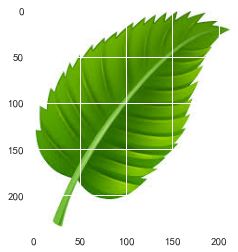

In [388]:
leaf = plt.imread('leaf.jpg')
plt.imshow(leaf)

In [389]:
# 添加停用词
stop_words = pd.read_csv('百度停用词表.txt', header=None)[0].values.tolist()
len(stop_words)

1395

In [390]:
# 添加自定义停用词

# stop_words.extend(['蟑螂', '小强', '效果', '都', '不', '还','效果' ])
stop_words.extend(['蟑螂', '小强', '效果', '都', '不', '还','效果', '双十', '评论','没有', '湿巾','填写'])

(-0.5, 213.5, 234.5, -0.5)

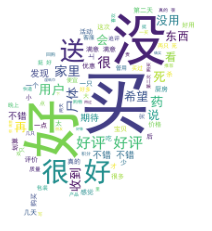

In [403]:
# 可视化
from wordcloud import WordCloud
# 变成字符串，空格隔开
comments2_str = ' '.join(comments2_cut)

wc = WordCloud(
                font_path='SimHei.ttf',
                mask=leaf, 
                background_color='white',
                stopwords=stop_words
        ).generate(comments2_str)
wc

# 显示
plt.imshow(wc)
plt.axis('off')

In [404]:
# 找出关键词权重
from jieba import analyse

In [405]:
# withWeight=True ： 显示权重
# topK=10 ： 排名前10
# comments2_str ： 字符串
analyse.extract_tags(comments2_str, topK=20, withWeight=True)
# analyse.extract_tags(comments2_str, topK=20)

# stop_worlds.extend(['蟑螂', '小强', '效果', '都', '不', '还','效果', '双十', '评论','没有', '湿巾','填写'])


[('蟑螂', 0.35483337835188716),
 ('效果', 0.21489916576864723),
 ('好评', 0.1206729851648264),
 ('双十', 0.08864717779198157),
 ('不错', 0.0836741582577527),
 ('小强', 0.08055066621503837),
 ('评论', 0.06282414761944319),
 ('满意', 0.05774111365231873),
 ('没有', 0.05624256087245512),
 ('湿巾', 0.055058565495170055),
 ('填写', 0.052651576702113845),
 ('非常', 0.04429630963450756),
 ('收到', 0.0441728936008786),
 ('没用', 0.043057835230483586),
 ('用户', 0.040283042468233346),
 ('追评', 0.04023510555416273),
 ('尸体', 0.03870068639461443),
 ('看到', 0.03791656136538734),
 ('划算', 0.03710354086090635),
 ('知道', 0.03613679234529995)]

### 安速

In [407]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\评论舆情数据')

ansu = pd.read_excel(files[0])
ansu

,产品名称,链接,评论页码,评论,评论日期
0,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,0,此用户没有填写评论!,2018-11-18 12:19:09
1,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,0,此用户没有填写评论!,2018-11-22 13:51:39
2,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,0,真没想到家里竟有这么多，昨晚上放的，今天早起都还在动，沙发底下，床底下，厨房几乎都是十几二十...,2018-11-23 13:57:18
3,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,0,效果还不错，每个盒子里都有蟑螂，感觉还不错，之前买过别的牌子，蟑螂都不怎么往里进，这次比以前...,2018-11-22 15:37:16
4,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,0,物流速度快，蟑螂基本上没有了，以前天天看到蟑螂到处爬，放了一个礼拜效果不错，放上去蟑螂自己就...,2018-11-24 12:02:57
...,...,...,...,...,...
1395,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,69,非常好用，价格特别实惠，比之前在京东买的优惠好多！商家特别专业耐心，询问的问题都耐心解答。如...,2018-10-31 23:50:52
1396,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,69,没用 引不来蟑螂 而且套餐价格比单买还贵 坑,2018-11-16 20:45:11
1397,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,69,这个挺好用的,2018-11-13 12:39:12
1398,日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,https://detail.tmall.com/item.htm?spm=a230r.1....,69,北北服务热情，细心体贴，北北推荐的东西很赞，一晚上就抓到了好多个,2018-11-06 09:32:12


In [408]:
# 获取评论数据
comments = ansu.评论.values.tolist()

# 把所有评论 拼接在一起，变成一个字符串
comments_str = ''.join(comments)

comments2 = re.sub(r'[^a-zA-Z0-9\u4E00-\u9FA5]', '',  comments_str )

# 对 评论数据 分词
comments2_cut = jieba.lcut(comments2)

# 变成字符串，空格隔开
comments2_str = ' '.join(comments2_cut)

(-0.5, 213.5, 234.5, -0.5)

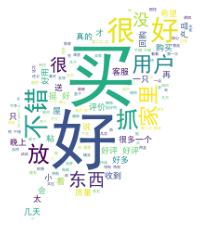

In [411]:
# 修改默认目录
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data')

# 可视化
wc = WordCloud(
                font_path='SimHei.ttf',
                mask=leaf, 
                background_color='white',
                stopwords=stop_words
        ).generate(comments2_str)
wc

# 显示
plt.imshow(wc)
plt.axis('off')

In [412]:
analyse.extract_tags(comments2_str, topK=20, withWeight=True)

[('蟑螂', 0.4425613116993905),
 ('效果', 0.18877754952988252),
 ('小强', 0.1252594652968634),
 ('不错', 0.12100765219053793),
 ('好评', 0.10402865490568726),
 ('填写', 0.07983911458948141),
 ('好用', 0.07775540961449753),
 ('评论', 0.0766969965582451),
 ('非常', 0.06216467961622949),
 ('用户', 0.061083877161557186),
 ('没有', 0.05886293397318243),
 ('购买', 0.05350106434645083),
 ('家里', 0.04934835384665711),
 ('真的', 0.04842411550207005),
 ('好多', 0.04540804285282931),
 ('第二次', 0.04210684424326338),
 ('东西', 0.042053861234930164),
 ('这个', 0.03883915306106439),
 ('晚上', 0.03800864243049137),
 ('满意', 0.03722691336554975)]

### 科凌虫控


In [413]:
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data\竞争数据\评论舆情数据')

ke = pd.read_excel(files[2])
ke

,产品名称,链接,评论页码,评论,评论日期
0,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,0,目前好像还没抓到蟑螂，可能我房间没有蟑螂 不要看了下面都是废话。因为本仙女很懒不想每个宝贝都...,2018-11-26 20:44:12
1,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,0,恶心的小强，效果很赞👍👍,2018-11-22 20:01:53
2,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,0,此用户没有填写评论!,2018-11-21 09:14:48
3,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,0,此用户没有填写评论!,2018-09-25 12:00:50
4,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,0,几年前用过这个牌子的，当时特别好用，这次发现小强立刻搜索，抱着试试看的心买的，还是有效果的，...,2018-11-22 20:15:24
...,...,...,...,...,...
1395,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,69,这个太好用了，我用来才来评价的，又来拍两盒，马上用马上见效,2018-11-17 10:39:02
1396,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,69,刚用的第一个星期有效果，过了之后又看到蟑螂了,2018-11-19 16:15:27
1397,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,69,比实体店划算多了,2018-11-16 23:44:48
1398,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,https://detail.tmall.com/item.htm?spm=a21ag.11...,69,物流很快，很划算，还没用，等用完了评效果,2018-11-20 08:57:20


In [414]:
# 获取评论数据
comments = ke.评论.values.tolist()

# 把所有评论 拼接在一起，变成一个字符串
comments_str = ''.join(comments)

comments2 = re.sub(r'[^a-zA-Z0-9\u4E00-\u9FA5]', '',  comments_str )

# 对 评论数据 分词
comments2_cut = jieba.lcut(comments2)

# 变成字符串，空格隔开
comments2_str = ' '.join(comments2_cut)

(-0.5, 213.5, 234.5, -0.5)

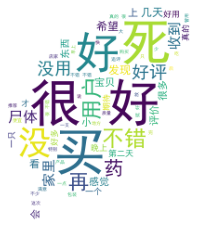

In [416]:
# 修改默认目录
os.chdir(r'D:\百度网盘\机器学习\电商文本挖掘\data')

# 可视化
wc = WordCloud(
                font_path='SimHei.ttf',
                mask=leaf, 
                background_color='white',
                stopwords=stop_words
        ).generate(comments2_str)
wc

# 显示
plt.imshow(wc)
plt.axis('off')

In [417]:
analyse.extract_tags(comments2_str, topK=20, withWeight=True)

[('蟑螂', 0.3957616750297246),
 ('效果', 0.28718890296762434),
 ('不错', 0.10562291989774374),
 ('小强', 0.0892032931389737),
 ('非常', 0.07830310566127902),
 ('好评', 0.0777227937673284),
 ('评论', 0.07198488797023295),
 ('收到', 0.0709499685224196),
 ('填写', 0.06924104675178522),
 ('没有', 0.06111176583841476),
 ('看到', 0.05559375259018387),
 ('没用', 0.05461978113236614),
 ('宝贝', 0.05440491853176104),
 ('用户', 0.052975432105817885),
 ('追评', 0.04816586423408541),
 ('好用', 0.04677714942788075),
 ('尸体', 0.0430638212795026),
 ('满意', 0.04258085940031134),
 ('包装', 0.0417760492091246),
 ('真的', 0.0412698139650575)]